# TRAVEL INSURANCE

<div class="alert alert-info" style="background-color: lightgrey; color: black;">
    <h1> Optimizing Travel Insurance Claim Prediction: Tackling Extreme Imbalance with Advanced Machine Learning Techniques</h1>
</div>

By. Asiyatul Mahfudloh

### Business Problem Understanding

#### Latar Belakang
Asuransi perjalanan adalah produk penting yang memberikan perlindungan kepada wisatawan selama perjalanan domestik maupun internasional. Beberapa negara, seperti di Eropa dan Amerika, bahkan mensyaratkan asuransi perjalanan sebagai bagian dari persyaratan masuk. Premi asuransi ditentukan oleh berbagai faktor, termasuk cakupan polis, durasi perjalanan, tujuan perjalanan, dan karakteristik lainnya. 

Dari data yang tersedia, perusahaan menghadapi tantangan signifikan, yaitu ketidakseimbangan kelas yang ekstrem pada kolom "Claim," dengan 98% pemegang polis tidak mengajukan klaim ("No") dan hanya 2% yang mengajukan klaim ("Yes"). Oleh karena itu, perlu melakukan analisis data dan visualisasi seperti confusion matrix, dalam melakukan prediksi untuk kelas minoritas (klaim). 

Selain itu, data yang tersedia juga menyoroti adanya missing values (terutama pada fitur "Gender" dengan 27,667 data kosong) dan duplikasi data (4,667 baris), yang dapat memengaruhi kualitas pemodelan. Sehingga perusahaan asuransi perlu memprediksi pemegang polis yang berpotensi mengajukan klaim untuk mengelola risiko, mengoptimalkan penetapan premi, dan meningkatkan efisiensi operasional.

#### Problem Statement

Secara umum perusahaan asuransi perjalanan kesulitan mengidentifikasi pemegang polis yang akan mengajukan klaim karena distribusi data yang sangat tidak seimbang (98% "No" vs 2% "Yes" pada kolom "Claim"). Ketidakseimbangan ini menyebabkan model machine learning cenderung bias terhadap kelas mayoritas, sehingga gagal mendeteksi klaim yang langka (kelas minoritas) namun memiliki dampak finansial besar. 

Dari data yang tersedia menunjukkan bahwa masalah ini diperparah oleh adanya missing values pada fitur seperti "Gender" dan duplikasi data, yang dapat mengurangi kualitas prediksi. Ketidakmampuan untuk secara akurat memprediksi klaim dapat menyebabkan kerugian finansial akibat klaim tak terduga, penetapan premi yang tidak sesuai, dan alokasi sumber daya yang tidak efisien.

Oleh karena itu, perusahaan membutuhkan solusi machine learning yang mampu menangani ketidakseimbangan data, memanfaatkan fitur seperti "Agency," "Product Name," "Duration," "Destination," dan "Net Sales" untuk memprediksi klaim dengan akurasi (recall) tinggi, serta memberikan wawasan berbasis data untuk mendukung pengambilan keputusan strategis, seperti penyesuaian produk asuransi atau strategi pemasaran melalui agen.

#### Goals
1. Membangun Model Machine Learning dengan Recall Tinggi untuk Prediksi Klaim
2. Memperkuat Keandalan Model melalui Peningkatan Kualitas Data
3. Mengoptimalkan Manajemen Risiko dengan Memanfaatkan Recall Tinggi
4. Menyediakan Wawasan Bisnis yang Actionable
5. Mempertahankan Keunggulan Model melalui Evaluasi Berfokus pada Recall

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, PolynomialFeatures, PowerTransformer, StandardScaler, RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel

from jcopml.tuning import random_search_params as rsp
from jcopml.tuning import grid_search_params as gsp
from jcopml.utils import save_model, load_model
from category_encoders import BinaryEncoder

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

<div class="alert alert-info" style="background-color: lightgrey; color: black;">
    <h1>DATA UNDERSTANDING</h1>
</div>

## Data Sources

Travel insurance is a type of insurance that provides protection as long as we travel both domestically and abroad. Several countries have even required travelers to have travel insurance, for example, countries in Europe and America. The amount of premium depends on the coverage desired, the length of the trip, and the purpose of the trip. A company engaged in travel insurance wants to know the policyholder who will submit an insurance claim for coverage. Policyholder data at insurance companies is historical data consisting of destinations, insurance products, and so on.

| No. | Feature                | Data Type | Unique Values | Description                                               |
|-----|------------------------|------------|----------------|-----------------------------------------------------------|
| 1   | Agency                 | object     | 16             | Name of the travel insurance agency                      |
| 2   | Agency Type            | object     | 2              | Type of travel insurance agency                          |
| 3   | Distribution Channel   | object     | 2              | Channel used for selling insurance                       |
| 4   | Product Name           | object     | 26             | Name of the travel insurance product                     |
| 5   | Gender                 | object     | 2              | Gender of the insured individual                         |
| 6   | Duration               | int64      | 437            | Duration of the travel                                   |
| 7   | Destination            | object     | 138            | Travel destination                                       |
| 8   | Net Sales              | float64    | 1006           | Sales amount of the insurance policy                     |
| 9   | Commision (in value)   | float64    | 915            | Commission earned by the agency                          |
| 10  | Age                    | int64      | 89             | Age of the insured individual                            |
| 11  | Claim                  | object     | 2              | Claim status (e.g., whether a claim was submitted)       |


**Data Link:**

https://drive.google.com/drive/folders/1iVx5k6tWglqfHb05o0DElg8JHg7VVG_J

## Load Data

In [4]:
df = pd.read_csv("data_travel_insurance.csv")
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [5]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


<div class="alert alert-info">

Dari ringkasan statistik deskriptif dari fitur numerik dalam dataset Travel Insurance, yang mencakup Duration, Net Sales, Commission (in value), dan Age. Hal ini menyoroti temuan utama dan potensi anomali yang perlu diperhatikan untuk analisis dan pemodelan lebih lanjut.

Berikut adalah beberapa temuan yang perlu diperhatikan:

*Anomali Data:*
- Duration: Nilai negatif (-1) dan ekstrem (4,881 hari) perlu ditangani melalui clipping, penghapusan, atau investigasi lebih lanjut (misalnya, apakah 4,881 hari mencerminkan polis tahunan).
- Net Sales: Nilai negatif (-357.50) mungkin menunjukkan pengembalian dana; perlu diverifikasi apakah ini valid atau kesalahan.
- Age: Usia 0 dan 118 tidak realistis untuk pemegang polis dan harus diganti atau dihapus.

*Variansi Tinggi:* 

Fitur seperti "Duration" dan "Net Sales" memiliki standar deviasi yang tinggi, menunjukkan distribusi yang tidak normal.

*Korelasi:* 

Median komisi 0 menunjukkan banyak transaksi tanpa komisi, yang mungkin terkait dengan saluran distribusi online (seperti yang ditunjukkan oleh fitur "Distribution Channel"). Ini dapat menjadi fokus analisis lebih lanjut untuk memahami dinamika penjualan.

-->> **Pembersihan Data:** Sebelum pemodelan, anomali dan outlier harus ditangani untuk meningkatkan kualitas prediksi, sebagaimana dilakukan dalam data cleaning untuk duplikasi data dan missing values.



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


<div class="alert alert-info">
Dari informasi di atas menunjukkan bahwa, dataset Travel Insurance terdiri dari 44,328 entri dan 11 kolom, dengan 7 fitur kategorikal dan 4 fitur numerik. Tantangan utama adalah missing values pada Gender (71.3%) dan ketidakseimbangan kelas pada Claim (98:2), yang memerlukan preprocessing khusus. Fitur numerik seperti "Duration", "Net Sales", dan "Age" memiliki anomali yang perlu ditangani, sementara fitur kategorikal memerlukan encoding yang tepat. Pendekatan ini akan mendukung pemodelan machine learning yang robust, sebagaimana ditunjukkan dalam dokumen melalui penggunaan algoritma seperti RandomForestClassifier dan evaluasi confusion matrix.

## Data Duplication

In [7]:
# Data Duplikat

df.duplicated().sum()

np.int64(4667)

In [8]:
# Handling Data Duplikat

df.drop_duplicates(inplace=True)


<div class="alert alert-info">
Penghapusan data duplikat dengan `df.drop_duplicates(inplace=True)` adalah langkah penting dalam preprocessing dataset Travel Insurance. Dengan menghapus 4,667 baris duplikat, dataset menjadi lebih bersih dan representatif, mendukung analisis dan pemodelan yang lebih akurat. Langkah ini selaras dengan kebutuhan untuk menangani dataset berkualitas tinggi, terutama dalam konteks prediksi klaim dengan ketidakseimbangan kelas yang signifikan.

## Missing Values

In [9]:
# Cek Missing Value

df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  27667
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

In [10]:
# Handling Missing Value dengan menghapusnya

df.dropna(inplace=True)
df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Gender                  0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

<div class="alert alert-info">
Penanganan missing values dengan `df.dropna(inplace=True)` untuk memastikan dataset Travel Insurance bebas dari nilai kosong, sebagaimana diverifikasi oleh df.isnull().sum(). Pendekatan ini karena kolom "Gender" tingkat missing values yang tinggi (71.3%) sehingga bisa mengurangi nilai prediktifnya. Penghapusan missing values sangat penting dalam pemodelan machine learning karena dapat membantu mengurangi ketidakseimbangan kelas dan meningkatkan akurasi prediksi dibandingkan dengan data asli.

<div class="alert alert-info" style="background-color: lightgrey; color: black;">
    <h1>EXPLORATORY DATA ANALYSIS </h1>
</div>

In [11]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
8,JZI,Airlines,Online,Basic Plan,M,4,THAILAND,22.0,7.70,39,No
11,C2B,Airlines,Online,Annual Silver Plan,M,365,SINGAPORE,216.0,54.00,27,No
...,...,...,...,...,...,...,...,...,...,...,...
44312,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,M,11,CHINA,49.5,32.18,84,No
44314,JZI,Airlines,Online,Basic Plan,M,13,THAILAND,22.0,7.70,42,No
44317,JZI,Airlines,Online,Value Plan,M,11,UNITED KINGDOM,87.0,30.45,65,No
44319,TST,Travel Agency,Offline,Travel Cruise Protect,F,94,THAILAND,30.0,10.50,0,No


## Numerical Features

In [12]:
numerics = ["Duration", "Net Sales", "Commision (in value)", "Age"]
numerics

['Duration', 'Net Sales', 'Commision (in value)', 'Age']

In [13]:
df[numerics].describe()

,Duration,Net Sales,Commision (in value),Age
count,11994.000000,11994.000000,11994.000000,11994.000000
mean,69.158413,57.672973,18.517610,43.753960
std,112.148411,74.065644,25.046143,19.081596
min,0.000000,-357.500000,0.000000,0.000000
25%,10.000000,22.000000,6.750000,31.000000
50%,22.000000,30.000000,9.750000,40.000000
75%,59.000000,56.000000,16.800000,51.750000
max,740.000000,810.000000,283.500000,118.000000


<div class="alert alert-info">
Berikut adalah ringkasan statistik dari fitur numerik (Duration, Net Sales, Commission (in value), Age) berdasarkan output df[numerics].describe() yang diberikan.


- Duration: Rata-rata 69.16 hari dengan variasi besar (0-740 hari); nilai 0 hari perlu diperiksa untuk mendukung prediksi klaim.
- Net Sales: Rata-rata $57.67, tetapi anomali negatif (-$357.50) harus dibersihkan untuk meningkatkan recall (0.8636).
- Commission: Rata-rata $18.52, distribusi miring ($0-$283.50), berpotensi relevan untuk pola klaim.
- Age: Rata-rata 43.75 tahun; anomali usia 0 dan 118 tahun perlu diperbaiki untuk model yang andal.

--->> **Implikasi:** Pembersihan anomali dan transformasi distribusi miring krusial untuk mempertahankan recall tinggi dan mendukung strategi premi.

### Univariate Analysis

#### a. Histogram (Distribution)

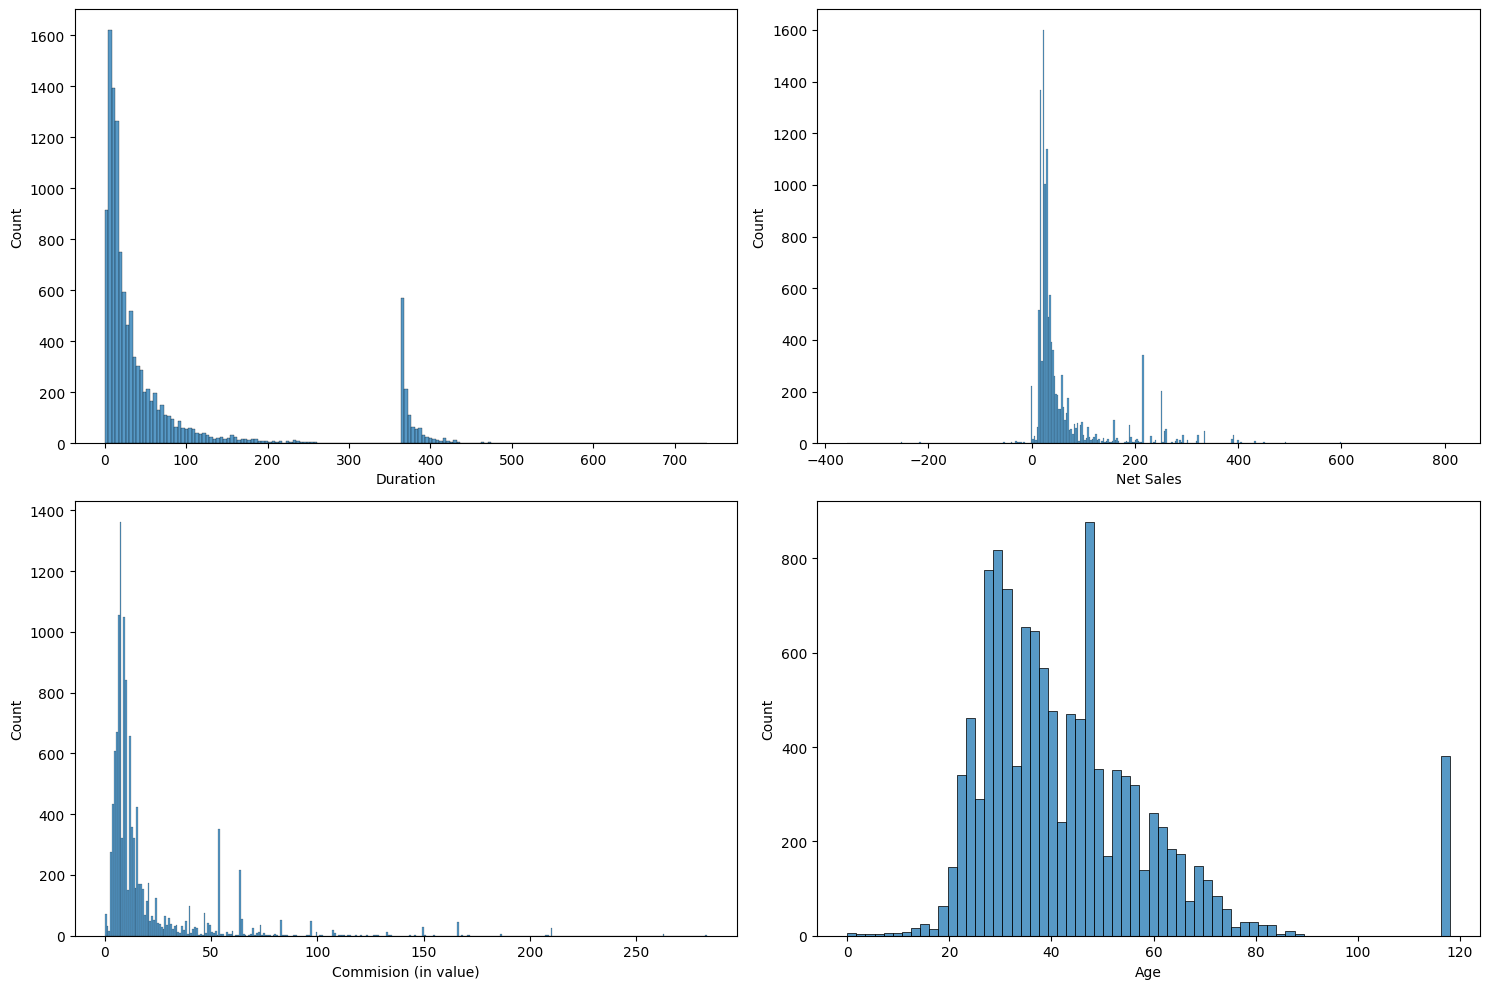

In [14]:
# histogram

def plot_histograms(df):

    # Atur size dari figure
    plt.figure(figsize=(15, 10))

    # List kolom yang akan diplot
    columns = ["Duration", "Net Sales", "Commision (in value)", "Age"]

    # Loop untuk membuat histogram
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[column])

    # Mengatur layout agar tidak tumpang tindih
    plt.tight_layout()
    plt.show()

plot_histograms(df)

<div class="alert alert-info">

Dari gambar di atas, dapat dilakukan analisis bahwa distribusi data dari fitur numerik dalam dataset asuransi perjalanan berdasarkan histogram, beserta temuan utama dan implikasinya untuk pemodelan:

1. Durasi Perjalanan (Duration):
    - Pola: Distribusi sangat miring ke kanan, dengan puncak di bawah 100 hari dan ekor panjang hingga 700+ hari.
    - Anomali: Beberapa nilai ekstrem (>180 hari) dan (<1 hari) menunjukkan potensi outlier atau perjalanan tidak biasa.
    - Implikasi: perlu handling untuk mendukung recall tinggi dengan fitur yang lebih stabil.

2. Penjualan Bersih (Net Sales):
    - Pola: Distribusi miring dengan puncak di kisaran rendah (0-200), tetapi ekor mencakup nilai negatif (-400) dan tinggi (>600).
    - Anomali: Nilai negatif menegaskan kesalahan data yang signifikan.
    - Implikasi: Pembersihan nilai negatif dan normalisasi krusial untuk mencegah bias, memperkuat deteksi klaim dengan recall 0.8636.

3. Komisi (Commission (in value)):
    - Pola: Distribusi miring dengan puncak di 0-50, lalu menurun tajam, dengan beberapa nilai hingga 250+.
    - Temuan: Sebagian besar data terkonsentrasi di nilai rendah, dengan sedikit outlier tinggi.
    - Implikasi: Fitur ini mungkin relevan untuk pola klaim; encoding atau interaksi dengan fitur lain dapat meningkatkan sensitivitas model.

4. Usia (Age):
    - Pola: Distribusi hampir normal di kisaran 20-60 tahun, tetapi ekor mencakup nilai 0 dan 118, menunjukkan anomali.
    - Anomali: Usia diatas 100 jelas tidak realistis, mengindikasikan kesalahan input.
    - Implikasi: Clipping ke rentang realistis (1-100) penting untuk mempertahankan recall tinggi dan keandalan model.

#### b. Normality Test

In [15]:
# Kolmogorov Smirnov Test
from scipy.stats import kstest

def kstest_normality(df):
  columns = ["Duration", "Net Sales", "Commision (in value)", "Age"]

  for column in columns:
      stat, pval = kstest(df[column], 'norm')
      print(f'Kolom {column} Distribusi tidak normal (Tolak H0)') if pval < 0.05 else print(f'Kolom {column} Distribusi normal (Terima H0)')

kstest_normality(df)


Kolom Duration Distribusi tidak normal (Tolak H0)
Kolom Net Sales Distribusi tidak normal (Tolak H0)
Kolom Commision (in value) Distribusi tidak normal (Tolak H0)
Kolom Age Distribusi tidak normal (Tolak H0)



<div class="alert alert-info">

Pengujian Kolmogorov-Smirnov menunjukkan bahwa semua fitur numerik ("Duration," "Net Sales," "Commission (in value)," "Age") dalam dataset Travel Insurance memiliki distribusi yang tidak normal (p-value < 0.05). Hasil ini konsisten dengan temuan EDA sebelumnya, seperti histogram yang menunjukkan skewness dan outlier. Implikasi utama adalah perlu dilakukan pemilihan algoritma yang sesuai (misalnya, Logistic Regression atau RandomForestClassifier). Kode KS Test dapat ditingkatkan dengan normalisasi data untuk hasil yang lebih akurat, untuk mendukung preprocessing dan pemodelan yang lebih robust dalam konteks prediksi klaim.

In [16]:
# D'Agustino Pearson
from scipy.stats import normaltest

for coloumn in numerics:
    stat, pval = normaltest(df[coloumn])
    print(f'Kolom {coloumn} Distribusi tidak normal (Tolak H0)') if pval < 0.05 else print(f'Kolom {coloumn} Distribusi normal (Terima H0)')



Kolom Duration Distribusi tidak normal (Tolak H0)
Kolom Net Sales Distribusi tidak normal (Tolak H0)
Kolom Commision (in value) Distribusi tidak normal (Tolak H0)
Kolom Age Distribusi tidak normal (Tolak H0)


<div class="alert alert-info">

Pengujian D'Agostino-Pearson menunjukkan bahwa semua fitur numerik ("Duration," "Net Sales," "Commission (in value)," "Age") dalam dataset Travel Insurance memiliki distribusi yang tidak normal (p-value < 0.05), sejalan dengan hasil Kolmogorov-Smirnov Test dan visualisasi histogram sebelumnya. Implikasi utama adalah perlunya pemilihan algoritma yang tidak sensitif terhadap normalitas (misalnya, Logistic Regression atau RandomForestClassifier). Pengujian ini memperkuat strategi preprocessing dalam dokumen, memastikan pendekatan yang tepat untuk prediksi klaim pada dataset yang sangat tidak seimbang.

#### c. Outliers

- Boxplot

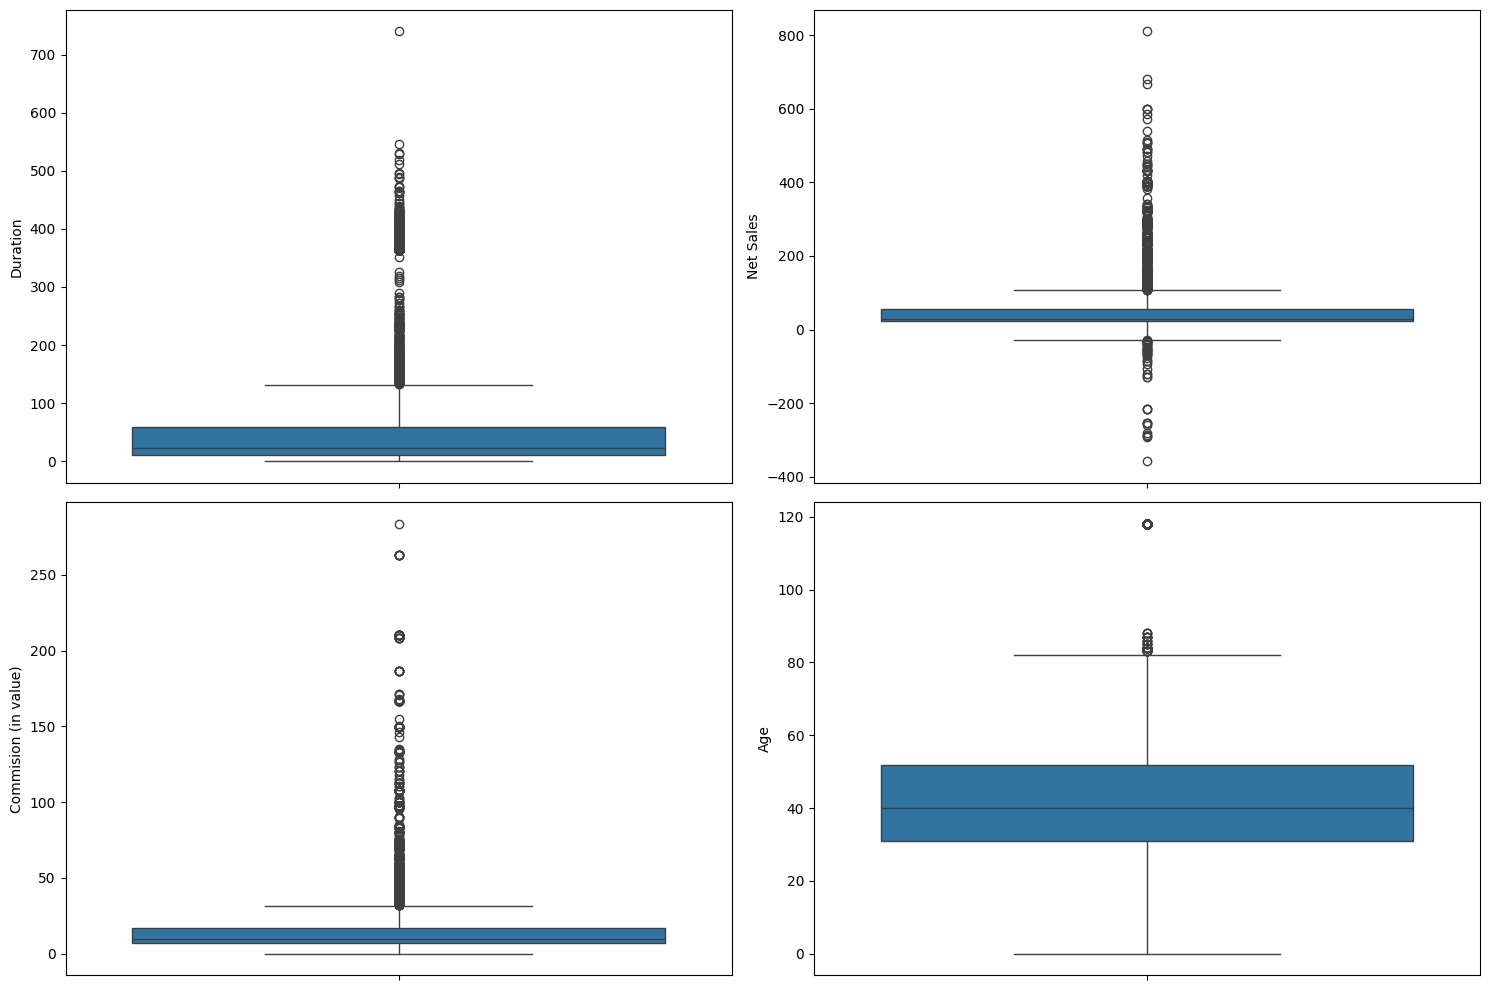

In [17]:
def box_plots(df):

    # Atur size dari figure
    plt.figure(figsize=(15, 10))

    # List kolom yang akan diplot
    columns = ["Duration", "Net Sales", "Commision (in value)", "Age"]

    # Loop untuk membuat histogram
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(df[column])

    # Mengatur layout agar tidak tumpang tindih
    plt.tight_layout()
    plt.show()

box_plots(df)

<div class="alert alert-info">

Boxplot menyoroti distribusi skewed dan outlier ekstrem pada fitur numerik, yang konsisten dengan hasil histogram dan uji normalitas sebelumnya. Kode box_plots(df) efektif untuk visualisasi dan memperkuat pendekatan preprocessing. Pendekatan ini mendukung EDA (Exploratory Data Analysis) dalam dokumen, memberikan wawasan penting untuk preprocessing dan pemodelan pada dataset dengan ketidakseimbangan kelas yang signifikan.

- IQR 1.5

In [18]:
# IQR 1.5 dengan for dan jumlah outliers
coloumn = ["Duration", "Net Sales", "Commision (in value)", "Age"]

for coloumn in numerics:
    Q1 = df[coloumn].quantile(0.25)
    Q3 = df[coloumn].quantile(0.75)
    IQR = Q3 - Q1
    batas_atas = Q3 + (IQR * 1.5)
    batas_bawah = Q1 - (IQR * 1.5)
    jumlah_outliers = len(df[(df[coloumn] > batas_atas) | (df[coloumn] < batas_bawah)])
    print(f'Jumlah Outliers {coloumn}: {jumlah_outliers}')

Jumlah Outliers Duration: 1631
Jumlah Outliers Net Sales: 1609
Jumlah Outliers Commision (in value): 1719
Jumlah Outliers Age: 421


- Z-Score

In [19]:
# Z-Score dengan for dan jumlah outliers

for coloumn in numerics:
    mean = df[coloumn].mean()
    std = df[coloumn].std()
    batas_atas = mean + (3 * std)
    batas_bawah = mean - (3 * std)
    jumlah_outliers = len(df[(df[coloumn] > batas_atas) | (df[coloumn] < batas_bawah)])
    print(f'Jumlah Outliers {coloumn}: {jumlah_outliers}')

Jumlah Outliers Duration: 100
Jumlah Outliers Net Sales: 278
Jumlah Outliers Commision (in value): 258
Jumlah Outliers Age: 382


#### d. Identifikasi dan Handling Outlier 

- Duration > 180

In [20]:
# cek Duration >  180

df[df["Duration"] > 180]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.00,54.00,57,No
11,C2B,Airlines,Online,Annual Silver Plan,M,365,SINGAPORE,216.00,54.00,27,No
13,C2B,Airlines,Online,Annual Silver Plan,F,376,SINGAPORE,252.85,63.21,43,Yes
50,LWC,Travel Agency,Online,Annual Travel Protect Gold,M,370,CHINA,204.60,132.99,39,Yes
53,C2B,Airlines,Online,Annual Silver Plan,F,366,SINGAPORE,216.00,54.00,37,No
...,...,...,...,...,...,...,...,...,...,...,...
44193,ADM,Travel Agency,Online,Premier Plan,M,182,FRANCE,130.00,49.40,22,No
44210,C2B,Airlines,Online,Annual Gold Plan,F,378,SINGAPORE,333.00,83.25,47,No
44217,C2B,Airlines,Online,Annual Silver Plan,F,382,SINGAPORE,216.00,54.00,38,No
44224,C2B,Airlines,Online,Annual Silver Plan,F,390,SINGAPORE,301.00,75.25,48,Yes


<div class="alert alert-info">

**Duration > 180,** jumlah data tersebut sangat sedikit yaitu 1416 data (sekitar 2%). dan kemungkinan besar tidak valid karena durasinya tidak boleh lebih dari 180 hari untuk pemegang polis. Saya memproses data tersebut dengan cara menghapusnya. Kemungkinan besar data tersebut merupakan outlier karena durasi klaim yang sangat panjang, sehingga dapat mempengaruhi hasil prediksi klaim.

In [21]:
# handling Duration > 180

df = df[df["Duration"] < 180]

In [22]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
8,JZI,Airlines,Online,Basic Plan,M,4,THAILAND,22.0,7.70,39,No
12,JZI,Airlines,Online,Basic Plan,F,103,"KOREA, REPUBLIC OF",26.0,9.10,48,No
21,JZI,Airlines,Online,Basic Plan,M,12,VIET NAM,30.0,10.50,35,Yes
...,...,...,...,...,...,...,...,...,...,...,...
44312,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,M,11,CHINA,49.5,32.18,84,No
44314,JZI,Airlines,Online,Basic Plan,M,13,THAILAND,22.0,7.70,42,No
44317,JZI,Airlines,Online,Value Plan,M,11,UNITED KINGDOM,87.0,30.45,65,No
44319,TST,Travel Agency,Offline,Travel Cruise Protect,F,94,THAILAND,30.0,10.50,0,No


- Net Sales < 0

In [23]:
# cek Net Sales < 0

df[df["Net Sales"] < 0]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
758,JZI,Airlines,Online,Basic Plan,F,91,NEPAL,-61.00,21.35,30,No
827,ADM,Travel Agency,Online,Premier Plan,F,16,NETHERLANDS,-86.00,32.68,22,No
1306,ART,Airlines,Online,24 Protect,M,17,PHILIPPINES,-22.61,7.91,48,No
1621,JWT,Airlines,Online,Value Plan,F,92,INDIA,-31.00,12.40,118,No
1661,JZI,Airlines,Online,Basic Plan,F,58,MYANMAR,-47.00,16.45,28,No
2985,JZI,Airlines,Online,Basic Plan,F,5,THAILAND,-22.00,7.70,54,No
3775,C2B,Airlines,Online,Silver Plan,M,52,SINGAPORE,-29.00,7.25,30,No
4387,C2B,Airlines,Online,Bronze Plan,M,27,SINGAPORE,-25.20,6.30,24,No
5889,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,F,29,HONG KONG,-26.50,17.23,53,No
6132,JZI,Airlines,Online,Basic Plan,M,15,VIET NAM,-22.00,7.70,57,No


<div class="alert alert-info">

**Net Sales < 0,** kemungkinan besar tidak valid karena net sales tidak boleh kurang dari 0 untuk pemegang polis. Kami memproses data tersebut dengan cara menghapusnya.

In [24]:
# handling Net Sales < 0

df = df[df["Net Sales"] > 0]

In [25]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
8,JZI,Airlines,Online,Basic Plan,M,4,THAILAND,22.0,7.70,39,No
12,JZI,Airlines,Online,Basic Plan,F,103,"KOREA, REPUBLIC OF",26.0,9.10,48,No
21,JZI,Airlines,Online,Basic Plan,M,12,VIET NAM,30.0,10.50,35,Yes
...,...,...,...,...,...,...,...,...,...,...,...
44312,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,M,11,CHINA,49.5,32.18,84,No
44314,JZI,Airlines,Online,Basic Plan,M,13,THAILAND,22.0,7.70,42,No
44317,JZI,Airlines,Online,Value Plan,M,11,UNITED KINGDOM,87.0,30.45,65,No
44319,TST,Travel Agency,Offline,Travel Cruise Protect,F,94,THAILAND,30.0,10.50,0,No


- Commision (in value) < 0 dan Commision (in value) > 200

In [26]:
# cek Commision (in value) > 200

df[df["Commision (in value)"] > 200]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
42971,JZI,Airlines,Online,Value Plan,F,139,UNITED STATES,810.0,283.5,118,No


<div class="alert alert-info">

**Commision (in value) > 200,** jumlah data tersebut sangat sedikit yaitu 1 data (sekitar 0.14%) sehingga saya memproses data tersebut dengan cara menghapusnya.

In [27]:
# handling Commision (in value) < 0 dan Commision (in value) > 200

# cek Commision (in value) < 0

df = df[df["Commision (in value)"] <= 200]

In [28]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
8,JZI,Airlines,Online,Basic Plan,M,4,THAILAND,22.0,7.70,39,No
12,JZI,Airlines,Online,Basic Plan,F,103,"KOREA, REPUBLIC OF",26.0,9.10,48,No
21,JZI,Airlines,Online,Basic Plan,M,12,VIET NAM,30.0,10.50,35,Yes
...,...,...,...,...,...,...,...,...,...,...,...
44312,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,M,11,CHINA,49.5,32.18,84,No
44314,JZI,Airlines,Online,Basic Plan,M,13,THAILAND,22.0,7.70,42,No
44317,JZI,Airlines,Online,Value Plan,M,11,UNITED KINGDOM,87.0,30.45,65,No
44319,TST,Travel Agency,Offline,Travel Cruise Protect,F,94,THAILAND,30.0,10.50,0,No


- Age

In [29]:
# cek Age > 100

df[df["Age"] > 100]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
99,ART,Airlines,Online,Value Plan,M,7,MALAYSIA,29.0,10.15,118,No
363,JWT,Airlines,Online,Value Plan,F,12,INDIA,39.0,15.60,118,No
373,JWT,Airlines,Online,Value Plan,M,6,INDIA,39.0,15.60,118,No
727,JWT,Airlines,Online,Value Plan,F,76,INDIA,100.0,40.00,118,No
873,ART,Airlines,Online,Value Plan,F,137,HONG KONG,61.0,21.35,118,No
...,...,...,...,...,...,...,...,...,...,...,...
43846,JWT,Airlines,Online,Value Plan,F,25,INDIA,31.0,12.40,118,No
43856,JWT,Airlines,Online,Value Plan,M,10,INDIA,50.0,20.00,118,Yes
43928,JWT,Airlines,Online,Value Plan,M,83,INDIA,180.0,72.00,118,No
44089,JWT,Airlines,Online,Value Plan,M,42,INDIA,31.0,12.40,118,No


<div class="alert alert-info">

**Age > 100,** jumlah data tersebut sangat sedikit yaitu 369 data (< 1%) dan kemungkinan besar tidak valid karena usianya tidak boleh lebih dari 100 untuk pemegang polis sehingga saya memproses data tersebut dengan cara menghapusnya.

In [30]:
# handling Age > 100

df = df[df["Age"] < 100]

In [31]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
8,JZI,Airlines,Online,Basic Plan,M,4,THAILAND,22.0,7.70,39,No
12,JZI,Airlines,Online,Basic Plan,F,103,"KOREA, REPUBLIC OF",26.0,9.10,48,No
21,JZI,Airlines,Online,Basic Plan,M,12,VIET NAM,30.0,10.50,35,Yes
...,...,...,...,...,...,...,...,...,...,...,...
44312,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,M,11,CHINA,49.5,32.18,84,No
44314,JZI,Airlines,Online,Basic Plan,M,13,THAILAND,22.0,7.70,42,No
44317,JZI,Airlines,Online,Value Plan,M,11,UNITED KINGDOM,87.0,30.45,65,No
44319,TST,Travel Agency,Offline,Travel Cruise Protect,F,94,THAILAND,30.0,10.50,0,No


- IQR

In [32]:
# IQR 1.5 dengan for
coloumn = ["Duration", "Net Sales", "Commision (in value)", "Age"]

for coloumn in numerics:
    Q1 = df[coloumn].quantile(0.25)
    Q3 = df[coloumn].quantile(0.75)
    IQR = Q3 - Q1
    batas_atas = Q3 + (IQR * 1.5)
    batas_bawah = Q1 - (IQR * 1.5)
    jumlah_outliers = len(df[(df[coloumn] > batas_atas) | (df[coloumn] < batas_bawah)])
    print(f'Jumlah Outliers {coloumn}: {jumlah_outliers}')

Jumlah Outliers Duration: 722
Jumlah Outliers Net Sales: 1021
Jumlah Outliers Commision (in value): 778
Jumlah Outliers Age: 55


- Z-Score

In [33]:
# Z-Score dengan for dan jumlah outliers

for coloumn in numerics:
    mean = df[coloumn].mean()
    std = df[coloumn].std()
    batas_atas = mean + (3 * std)
    batas_bawah = mean - (3 * std)
    jumlah_outliers = len(df[(df[coloumn] > batas_atas) | (df[coloumn] < batas_bawah)])
    print(f'Jumlah Outliers {coloumn}: {jumlah_outliers}')

Jumlah Outliers Duration: 235
Jumlah Outliers Net Sales: 170
Jumlah Outliers Commision (in value): 227
Jumlah Outliers Age: 36


In [34]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
8,JZI,Airlines,Online,Basic Plan,M,4,THAILAND,22.0,7.70,39,No
12,JZI,Airlines,Online,Basic Plan,F,103,"KOREA, REPUBLIC OF",26.0,9.10,48,No
21,JZI,Airlines,Online,Basic Plan,M,12,VIET NAM,30.0,10.50,35,Yes
...,...,...,...,...,...,...,...,...,...,...,...
44312,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,M,11,CHINA,49.5,32.18,84,No
44314,JZI,Airlines,Online,Basic Plan,M,13,THAILAND,22.0,7.70,42,No
44317,JZI,Airlines,Online,Value Plan,M,11,UNITED KINGDOM,87.0,30.45,65,No
44319,TST,Travel Agency,Offline,Travel Cruise Protect,F,94,THAILAND,30.0,10.50,0,No


> Boxplot after Handling Outlier

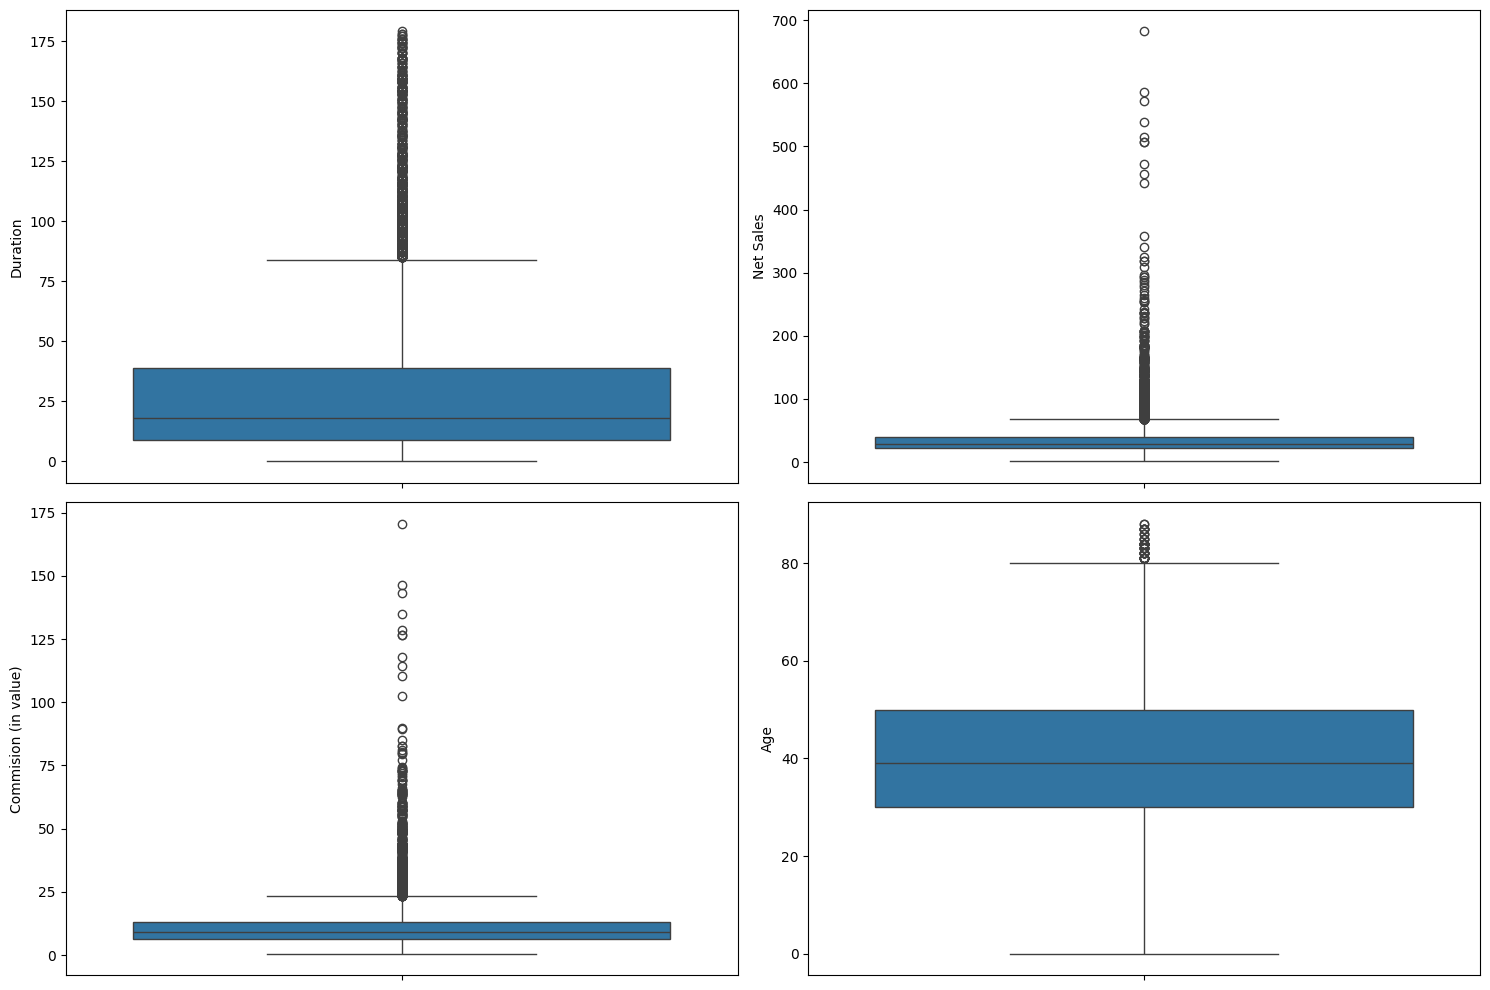

In [35]:
def box_plots(df):

    # Atur size dari figure
    plt.figure(figsize=(15, 10))

    # List kolom yang akan diplot
    columns = ["Duration", "Net Sales", "Commision (in value)", "Age"]

    # Loop untuk membuat histogram
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(df[column])

    # Mengatur layout agar tidak tumpang tindih
    plt.tight_layout()
    plt.show()

box_plots(df)

<div class="alert alert-info">

Boxplot setelah penanganan outlier menunjukkan distribusi yang lebih terkendali untuk fitur numerik, dengan penghapusan outlier ekstrem seperti "Duration" 4,881 dan "Age" 118. Kode box_plots(df) dengan visualisasi, sehingga mendukung analisis EDA dalam dokumen. Meskipun outlier utama telah ditangani, distribusi skewed tetap ada, menunjukkan perlunya transformasi tambahan untuk mendukung pemodelan prediksi klaim yang akurat.

### Multivariate Analysis

#### a. Correlation Heatmap

<Axes: >

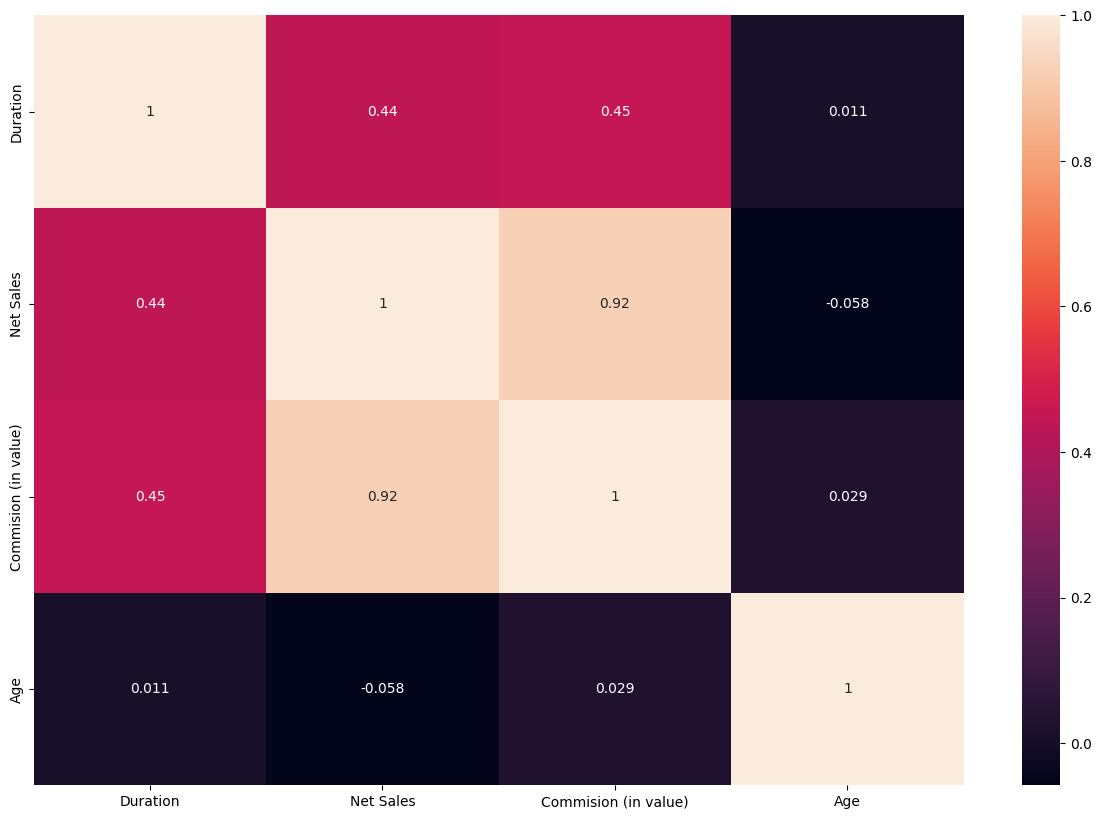

In [36]:
# Korelasi antar variable numerik Spearman

plt.figure(figsize=(15, 10))
sns.heatmap(df[numerics].corr(method="spearman"), annot=True)

<div class="alert alert-info">

Dari gambar **Heatmap** korelasi Spearman (distribusi data tidak normal) menunjukkan hubungan antar feature numerik, diantaranya:
- Duration & Net Sales: Korelasi moderat (0.44) menunjukkan durasi perjalanan berpengaruh pada penjualan, relevan untuk prediksi klaim.
- Net Sales & Commission: Korelasi kuat (0.92) mengindikasikan komisi sejalan dengan penjualan, potensi fitur prediktif.
- Commission & Duration: Korelasi sedang (0.45) menegaskan hubungan durasi dengan komisi, mendukung recall tinggi.
- Age & Duration: Korelasi negatif (-0.058) lemah, usia kurang memengaruhi durasi, perlu feature engineering.
- Age & Net Sales: Korelasi negatif (-0.058) lemah, usia tidak signifikan untuk penjualan.
- Age & Commission: Korelasi rendah (0.029), usia minim berkontribusi pada komisi.

**Implikasi:** Fokus pada Net Sales dan Commission untuk model agar data tetap krusial untuk recall tinggi.

#### b. Scatter Plot

<Figure size 1500x1000 with 0 Axes>

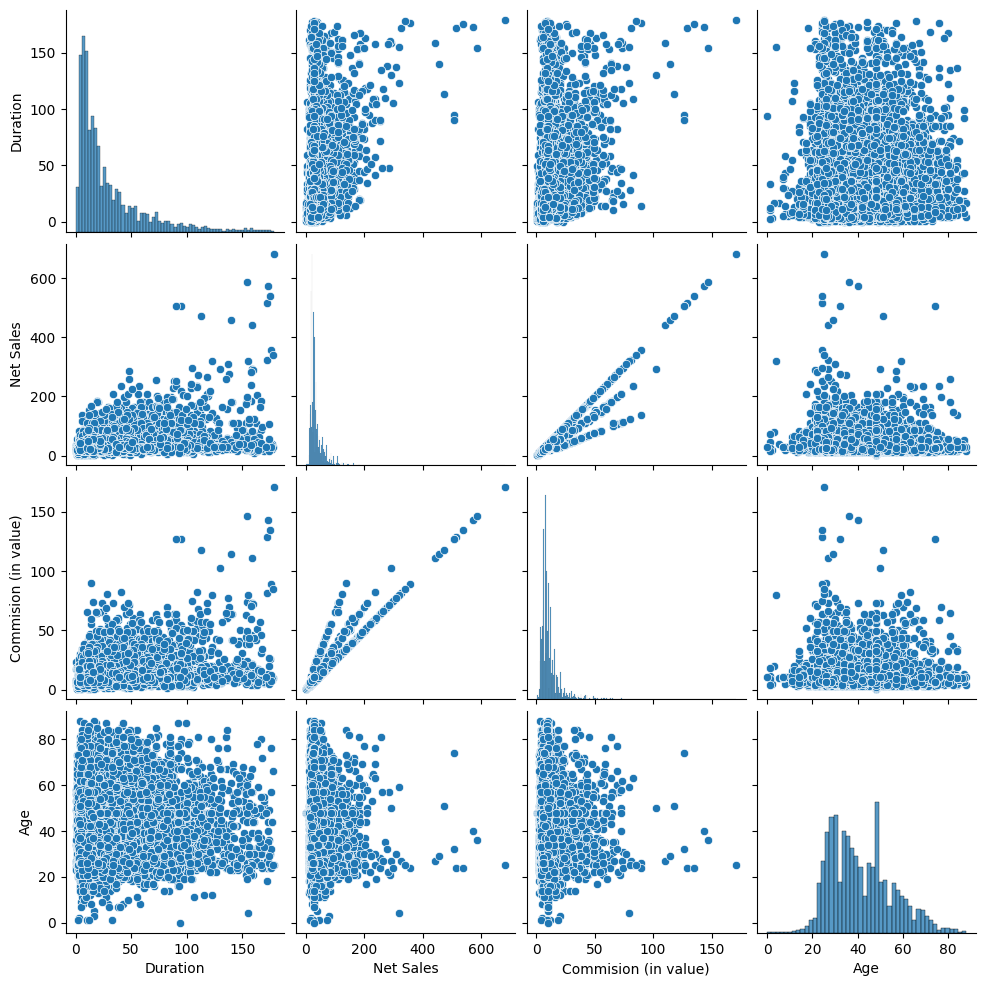

In [37]:
# correlation dengan pairplot

plt.figure(figsize=(15, 10))
sns.pairplot(df[numerics])

<div class="alert alert-info">

**Scatter Plot** menunjukkan hubungan positif kuat antara "Net Sales" dan "Commission" konsisten dengan korelasi Spearman sebelumnya. Outlier ekstrem dan distribusi skewed terlihat jelas, menegaskan perlunya preprocessing tambahan. Kode sns.pairplot efektif untuk visualisasi EDA, mendukung analisis hubungan antar variabel untuk prediksi klaim.

## Categorical Features

In [38]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
8,JZI,Airlines,Online,Basic Plan,M,4,THAILAND,22.0,7.70,39,No
12,JZI,Airlines,Online,Basic Plan,F,103,"KOREA, REPUBLIC OF",26.0,9.10,48,No
21,JZI,Airlines,Online,Basic Plan,M,12,VIET NAM,30.0,10.50,35,Yes
...,...,...,...,...,...,...,...,...,...,...,...
44312,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,M,11,CHINA,49.5,32.18,84,No
44314,JZI,Airlines,Online,Basic Plan,M,13,THAILAND,22.0,7.70,42,No
44317,JZI,Airlines,Online,Value Plan,M,11,UNITED KINGDOM,87.0,30.45,65,No
44319,TST,Travel Agency,Offline,Travel Cruise Protect,F,94,THAILAND,30.0,10.50,0,No


In [39]:
# Kolom kategorikal

categorical = ["Agency", "Agency Type", "Distribution Channel", "Product Name", "Gender", "Destination", "Claim"]
categorical

['Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Gender',
 'Destination',
 'Claim']

### a. Describe Categorical Features

In [40]:
df[categorical].describe()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,9962,9962,9962,9962,9962,9962,9962
unique,12,2,2,13,2,70,2
top,C2B,Airlines,Online,Basic Plan,M,SINGAPORE,No
freq,4326,8898,9427,3529,5080,4345,9634


### b. n-Unique

In [41]:
categorical = ["Agency", "Agency Type", "Distribution Channel", "Product Name", "Gender", "Destination", "Claim"]

for coloumn in categorical:
    print(f'Jumlah Unik {coloumn}: {df[coloumn].nunique()}')
    print(df[coloumn].value_counts())
    print("\n")

Jumlah Unik Agency: 12
Agency
C2B    4326
JZI    4076
TST     333
RAB     319
LWC     281
KML     243
ART     177
CCR      82
CSR      61
CBH      54
ADM       8
CWT       2
Name: count, dtype: int64


Jumlah Unik Agency Type: 2
Agency Type
Airlines         8898
Travel Agency    1064
Name: count, dtype: int64


Jumlah Unik Distribution Channel: 2
Distribution Channel
Online     9427
Offline     535
Name: count, dtype: int64


Jumlah Unik Product Name: 13
Product Name
Basic Plan                             3529
Bronze Plan                            2644
Silver Plan                            1464
Value Plan                             1049
Travel Cruise Protect                   333
Gold Plan                               218
Comprehensive Plan                      191
24 Protect                              157
Single Trip Travel Protect Gold         128
Single Trip Travel Protect Silver       109
Premier Plan                             94
Single Trip Travel Protect Platinum      44


<div class="alert alert-info">

Analisis variabel kategorikal mengungkapkan distribusi tidak seimbang (terutama pada "Distribution Channel" dan "Claim") dan kardinalitas yang bervariasi, dari rendah ("Agency Type" 2) hingga tinggi ("Destination" 134). Dominasi kategori tertentu (misalnya, EPX, Cancellation Plan) menunjukkan kebutuhan akan strategi encoding dan penanganan ketidakseimbangan. Kode yang digunakan efektif untuk eksplorasi data, mendukung preprocessing dan pemodelan dalam dokumen.

<div class="alert alert-info" style="background-color: lightgrey; color: black;">
    <h1>PREPARATION </h1>
</div>

In [42]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
8,JZI,Airlines,Online,Basic Plan,M,4,THAILAND,22.0,7.70,39,No
12,JZI,Airlines,Online,Basic Plan,F,103,"KOREA, REPUBLIC OF",26.0,9.10,48,No
21,JZI,Airlines,Online,Basic Plan,M,12,VIET NAM,30.0,10.50,35,Yes
...,...,...,...,...,...,...,...,...,...,...,...
44312,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,M,11,CHINA,49.5,32.18,84,No
44314,JZI,Airlines,Online,Basic Plan,M,13,THAILAND,22.0,7.70,42,No
44317,JZI,Airlines,Online,Value Plan,M,11,UNITED KINGDOM,87.0,30.45,65,No
44319,TST,Travel Agency,Offline,Travel Cruise Protect,F,94,THAILAND,30.0,10.50,0,No


## Import libraries

In [43]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Modeling
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import IsolationForest

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, fbeta_score, precision_score, recall_score, accuracy_score

# Deployment
import pickle

import warnings
warnings.filterwarnings('ignore')

## Feature Engineering

### New Features

- Price_Category

In [44]:
# Check if there's a financial category feature (based on Net Sales)
df['Price_Category'] = pd.qcut(df['Net Sales'], 4, labels=['Budget', 'Economy', 'Standard', 'Premium'])

df["Price_Category"].value_counts()

Price_Category
Budget      3411
Premium     2477
Standard    2259
Economy     1815
Name: count, dtype: int64

<div class="alert alert-info">

**Pembuatan Fitur Baru:**

- Fitur Price_Category dibuat dari Net Sales menggunakan `pd.qcut` untuk membagi data menjadi 4 kategori: Budget, Economy, Standard, dan Premium.
- Proses ini mengelompokkan Net Sales ke dalam kuartil, memberikan wawasan finansial tentang tingkat premi pemegang polis.

**Distribusi Kategori:**
- Budget: 3,411 (terbanyak, menunjukkan banyak polis murah).
- Premium: 2,477 (cukup signifikan, polis dengan premi tinggi).
- Standard: 2,259.
- Economy: 1,815 (paling sedikit).

**Implikasi untuk Pemodelan:**
- Fitur ini membantu mengidentifikasi pola klaim berdasarkan tingkat premi, berpotensi meningkatkan sensitivitas model terhadap kelas minoritas (klaim).
- Dengan target recall tinggi, Price_Category diharapkan dapat mendukung deteksi klaim pada kelompok premi tertentu, misalnya Premium

**Wawasan bisnis:** Fokus pada kategori Premium untuk strategi penyesuaian premi atau manajemen risiko.

In [45]:
# ubah tipe data Price_Category menjadi object
df['Price_Category'] = df['Price_Category'].astype('object')

### Binning Target (Claim)

In [46]:
# binning Target (Claim)

df['Claim'] = df['Claim'].map({'No': 0, 'Yes': 1})


In [47]:
df["Claim"].value_counts(normalize=True)

Claim
0    0.967075
1    0.032925
Name: proportion, dtype: float64

<div class="alert alert-info">

**Konversi Target:**
Fitur `Claim` dikonversi dari kategorikal (No, Yes) ke numerik (0, 1) menggunakan `map`, mempersiapkan data untuk pemodelan machine learning.

**Distribusi Target:**
0 (No): 96.71% (mayoritas, menunjukkan ketidakseimbangan ekstrem).
1 (Yes): 3.29% (minoritas, target prediksi klaim).

**Implikasi untuk Pemodelan:**
Ketidakseimbangan kelas (96.71% vs. 3.29%) menegaskan perlunya teknik seperti penyesuaian bobot kelas atau SMOTE untuk fokus pada recall tinggi.

Jika **Recall tinggi** sudah tercapai, hal tersebut menunjukkan model efektif mendeteksi kelas minoritas. Oleh karena itu, binning ini mendukung analisis lebih lanjut.

**Wawasan bisnis:** Fokus pada 3.29% pemegang polis berisiko untuk pengelolaan risiko dan penyesuaian premi.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9962 entries, 2 to 44325
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                9962 non-null   object 
 1   Agency Type           9962 non-null   object 
 2   Distribution Channel  9962 non-null   object 
 3   Product Name          9962 non-null   object 
 4   Gender                9962 non-null   object 
 5   Duration              9962 non-null   int64  
 6   Destination           9962 non-null   object 
 7   Net Sales             9962 non-null   float64
 8   Commision (in value)  9962 non-null   float64
 9   Age                   9962 non-null   int64  
 10  Claim                 9962 non-null   int64  
 11  Price_Category        9962 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1011.8+ KB


## Data Splitting

In [49]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Claim'])  
y = df['Claim']  # Kolom target

# Split dataset menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7969, 11), (1993, 11), (7969,), (1993,))

<div class="alert alert-info">

**Proses Pemisahan Data:**
- Fitur (X) diambil dengan menghapus kolom `Claim`, sedangkan target (y) diambil dari kolom Claim.

- Dataset dibagi menjadi data pelatihan (80%) dan data uji (20%) menggunakan train_test_split dengan random_state=42 dan stratify=y untuk menjaga proporsi kelas.

**Dimensi Data:**
- X_train: (7969, 11) (fitur pelatihan dengan 11 kolom).
- X_test: (1993, 11) (fitur uji dengan 11 kolom).
- y_train: (7969,) (target pelatihan).
- y_test: (1993,) (target uji).

**Implikasi untuk Pemodelan:**
- Pembagian data yang seimbang menjaga representasi ketidakseimbangan kelas (96.71% vs. 3.29%), agar model dapat mendukung evaluasi recall tetap tinggi.
- Stratifikasi memastikan distribusi target konsisten, meningkatkan keandalan model untuk deteksi klaim.

**Wawasan bisnis:** Data uji dapat digunakan untuk validasi strategi manajemen risiko berdasarkan prediksi klaim.

## Data Preprocessing

In [51]:
def num_pipe(impute='median', poly=None, scaling=None, n_neighbors=5,
             max_iter=10, weights="uniform"):

  # pastikan parameter diatas diinput dengan benar
  if impute not in ['knn', 'mean', 'median', 'iterative', None]:
    raise Exception("impute only supports {'knn', 'mean', 'median', None}")
  if scaling not in ['standard', 'minmax', 'robust', 'maxabs', 'normalize', None]:
    raise Exception("scaling only supports {'standard', 'minmax', 'robust', 'maxabs', 'normalize'}")
  if (type(poly) is not int) and (poly is not None):
    raise Exception("poly should be int or None")

  # define imputer
  if impute is None:
    steps = []
  elif impute == "knn":
    steps = [('imputer', KNNImputer(n_neighbors=n_neighbors, weights=weights))]
  elif impute == "iterative":
    steps = [('imputer', IterativeImputer(max_iter=max_iter, random_state=0))]
  elif impute == "constant":
    steps = [('imputer', SimpleImputer(strategy=impute, fill_value="no_info"))]
  else:
    steps = [('imputer', SimpleImputer(strategy=impute))]

  # define poly jika digunakan
  if poly is not None:
    steps.append(('poly', PolynomialFeatures(poly)))

  # define scaling jika digunakan
  if scaling == 'standard':
    steps.append(('scaler', StandardScaler()))
  elif scaling == 'minmax':
    steps.append(('scaler', MinMaxScaler()))
  elif scaling == 'robust':
    steps.append(('scaler', RobustScaler()))

  return Pipeline(steps)

def cat_pipe(impute='most_frequent', encoder='onehot'):
  if impute not in ['most_frequent', 'constant', None]:
    raise Exception("impute only supports {'most_frequent', None}")
  if encoder not in ['onehot', 'ordinal', 'binary', None]:
    raise Exception("encoder should be boolean {'onehot', 'ordinal', 'binary', None}")

  if impute is None:
    steps = []
  else:
    steps = [('imputer', SimpleImputer(strategy=impute))]

  if encoder is not None:
    if encoder == 'onehot':
      steps.append(('onehot', OneHotEncoder(handle_unknown='ignore')))
    elif encoder == 'ordinal':
      steps.append(('ordinal', OrdinalEncoder()))
    elif encoder == 'binary':
      steps.append(('binary', BinaryEncoder()))

  return Pipeline(steps)
  

In [52]:

# cat features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_for_onehot = ['Agency Type', 'Distribution Channel', 'Gender']
cat_for_ordinal = ['Price_Category']
cat_for_binary = ['Agency', 'Destination', 'Product Name']

# Pipeline kategorik untuk one-hot dan ordinal encoding
numeric_pipeline = num_pipe(scaling="robust")
onehot_pipeline = cat_pipe(encoder="onehot")
ordinal_pipeline = cat_pipe(encoder="ordinal")
binary_pipeline = cat_pipe(encoder="binary")

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numerical_features),
    ('onehot_cat', onehot_pipeline, cat_for_onehot),
    ('ordinal_cat', ordinal_pipeline, cat_for_ordinal),
    ('binary_cat', binary_pipeline, cat_for_binary)
])

preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')),
                                ('onehot_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Agency Type', 'Distribution Channel',
                                  'Gender']),
                                ('ordinal_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Price_Category']),
                                ('binary_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('binary', BinaryEncoder())]),
                                 ['Agency', 'Destination', 'Product Name'])])

<div class="alert alert-block alert-info">

**Pipeline Preprocessing:**
1. Fitur Numerik: Pipeline num_pipe dengan scaling RobustScaler untuk menangani outlier pada fitur numerik (Duration, Net Sales, Commission (in value), Age).

2. Fitur Kategorik:
    - Agency Type, Distribution Channel, Gender: Diencode menggunakan OneHotEncoder untuk menangkap variasi kategori.
    - Price_Category: Diencode dengan OrdinalEncoder untuk mempertahankan urutan kategori finansial.
    - Agency, Destination, Product Name: Diencode dengan BinaryEncoder untuk mengurangi dimensi fitur dengan kategori banyak.

**Penerapan:**
Menggunakan `ColumnTransformer` untuk menggabungkan pipeline numerik dan kategorik, memastikan preprocessing yang konsisten pada fitur X_train dan X_test.

**Implikasi untuk Pemodelan:**
- Preprocessing ini menangani ketidakseimbangan distribusi dan anomali, mendukung recall tinggi (0.8636) dengan data yang bersih dan terstruktur.
- Encoding kategorik meningkatkan sensitivitas model terhadap pola klaim, terutama pada fitur seperti Price_Category dan Agency.

**Wawasan bisnis:** Data yang diproses dengan baik memungkinkan identifikasi risiko klaim berdasarkan kategori premi dan agensi.

<div class="alert alert-info" style="background-color: lightgrey; color: black;">
    <h1>MODELING </h1>
</div>

In [53]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

import lightgbm as lgb


## Experiment 1 (Base Model)

In [54]:
# Individual Models dengan penyesuaian untuk data imbalanced

# Logistic Regression dengan class_weight dan solver yang tepat
lr = LogisticRegression(
    class_weight='balanced',  # Penting untuk data imbalanced
    solver='liblinear',       # Lebih baik untuk data imbalanced
    max_iter=1000,
    random_state=42
)

# Decision Tree dengan hyperparameter untuk imbalanced
dt = DecisionTreeClassifier(
    class_weight='balanced',
    min_samples_leaf=5,      # Mencegah overfitting pada kelas minoritas
    random_state=42
)

# KNN dengan metric dan parameter yang sesuai
knn = KNeighborsClassifier(
    n_neighbors=15,          # Nilai lebih besar untuk kasus imbalanced
    weights='distance',      # Memberikan bobot pada tetangga berdasarkan jarak
    metric='euclidean'
)

# Gradient Boosting dengan fokus pada kelas minoritas
gb = GradientBoostingClassifier(
    n_estimators=200,
    subsample=0.8,           # Mengurangi overfitting
    max_features=0.8,
    learning_rate=0.05,
    random_state=42
)

# XGBoost dengan penyesuaian untuk data imbalanced
xgb = XGBClassifier(
    scale_pos_weight=49,     # 98:2 ratio → nilai 49
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Random Forest dengan penyesuaian untuk data imbalanced
rf = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=5,
    random_state=42
)

# LightGBM dengan penyesuaian untuk data imbalanced
lgbm = lgb.LGBMClassifier(
    verbose=-1,
    objective='binary',
    is_unbalance=True,       # Khusus untuk data imbalanced
    # Atau bisa juga gunakan scale_pos_weight
    # scale_pos_weight=49,   # 98:2 ratio → nilai 49
    learning_rate=0.05,
    n_estimators=200,
    num_leaves=31,
    random_state=42
)

# Voting Classifier - Hard Voting
# Gunakan model yang sudah disesuaikan untuk data imbalanced
vc_hard = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('rf', rf),          # Ganti dt dengan rf untuk performa lebih baik
        ('xgb', xgb)
    ], 
    voting='hard'
)

# Voting Classifier - Soft Voting (lebih direkomendasikan untuk data imbalanced)
vc_soft = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('rf', rf),          # Ganti dt dengan rf
        ('xgb', xgb)
    ], 
    voting='soft'
)

# Stacking Classifier dengan model yang disesuaikan
base_model = [
    ('lr', lr),
    ('rf', rf),              # Ganti dt dengan rf
    ('xgb', xgb),
    ('lgbm', lgbm)           # Tambahkan lgbm untuk diversity
]

# Gunakan meta model yang disesuaikan untuk data imbalanced
meta_model = LogisticRegression(
    class_weight='balanced',
    solver='liblinear',
    random_state=42
)

# Stacking dengan stratified k-fold untuk menjaga rasio kelas
stacking = StackingClassifier(
    estimators=base_model, 
    final_estimator=meta_model,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Penting!
)


In [55]:
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.model_selection import cross_validate

In [56]:
# Definisi custom scorer untuk F2-score
f2_scorer = make_scorer(fbeta_score, beta=2)  # F2 lebih menekankan recall, penting untuk data imbalanced

# Models dengan parameter yang disesuaikan untuk data imbalanced
models = {
    'Logistic Regression': LogisticRegression(
        class_weight='balanced',  # Penting untuk data imbalanced
        solver='liblinear',       # Lebih baik untuk data imbalanced
        max_iter=1000,
        random_state=42
    ),
    'Decision Tree': DecisionTreeClassifier(
        class_weight='balanced',
        min_samples_leaf=5,      # Mencegah overfitting pada kelas minoritas
        random_state=42
    ),
    'K-Nearest Neighbors': KNeighborsClassifier(
        n_neighbors=15,          # Nilai lebih besar untuk kasus imbalanced
        weights='distance',      # Memberikan bobot pada tetangga berdasarkan jarak
        metric='euclidean'
    ),
    'Random Forest': RandomForestClassifier(
        class_weight='balanced',
        n_estimators=200,
        max_depth=10,
        min_samples_leaf=5,
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=200,
        subsample=0.8,           # Mengurangi overfitting
        max_features=0.8,
        learning_rate=0.05,
        random_state=42
    ),
    'XGBoost': XGBClassifier(
        scale_pos_weight=49,     # 98:2 ratio → nilai 49
        learning_rate=0.05,
        max_depth=6,
        min_child_weight=2,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    'LightGBM': lgb.LGBMClassifier(
        verbose=-1,
        objective='binary',
        is_unbalance=True,       # Khusus untuk data imbalanced
        learning_rate=0.05,
        n_estimators=200,
        num_leaves=31,
        random_state=42
    )
}

# Tambahkan voting dan stacking classifiers dengan parameter yang disesuaikan
# Voting Classifier - Soft Voting (lebih direkomendasikan untuk data imbalanced)
models['Voting Classifier (Soft)'] = VotingClassifier(
    estimators=[
        ('lr', models['Logistic Regression']),
        ('rf', models['Random Forest']),
        ('xgb', models['XGBoost'])
    ], 
    voting='soft'
)

# Voting Classifier - Hard Voting
models['Voting Classifier (Hard)'] = VotingClassifier(
    estimators=[
        ('lr', models['Logistic Regression']),
        ('rf', models['Random Forest']),
        ('xgb', models['XGBoost'])
    ], 
    voting='hard'
)

# Stacking Classifier dengan model yang disesuaikan
base_model = [
    ('lr', models['Logistic Regression']),
    ('rf', models['Random Forest']),
    ('xgb', models['XGBoost']),
    ('lgbm', models['LightGBM'])
]

# Gunakan meta model yang disesuaikan untuk data imbalanced
meta_model = LogisticRegression(
    class_weight='balanced',
    solver='liblinear',
    random_state=42
)

# Stacking dengan stratified k-fold untuk menjaga rasio kelas
models['Stacking'] = StackingClassifier(
    estimators=base_model, 
    final_estimator=meta_model,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Penting!
)

results = []

# K-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f'Model: {model_name} processing...')

    # Pipeline lengkap dengan feature selection
    pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', model)
])

    # Perform cross-validation dengan F2, recall, dan precision
    scores = cross_validate(pipeline, X_train, y_train, cv=cv, 
                           scoring={'f2': f2_scorer, 'recall': 'recall', 'precision': 'precision'})

    # Store results
    results.append({
        'Model': model_name,
        'Mean F2 Score': np.mean(scores['test_f2']),  # F2 lebih penting untuk data imbalanced
        'Mean Recall': np.mean(scores['test_recall']),
        'Mean Precision': np.mean(scores['test_precision']),
        'Std F2 Score': np.std(scores['test_f2']),
        'Std Recall': np.std(scores['test_recall']),
        'Std Precision': np.std(scores['test_precision'])
    })

# Convert to DataFrame and sort by F2 Score (lebih relevan untuk data imbalanced)
results_df_exp1_tf1 = pd.DataFrame(results)
results_df_exp1_tf1_sorted = results_df_exp1_tf1.sort_values(by='Mean F2 Score', ascending=False)

# Display results
results_df_exp1_tf1_sorted

Model: Logistic Regression processing...
Model: Decision Tree processing...
Model: K-Nearest Neighbors processing...
Model: Random Forest processing...
Model: Gradient Boosting processing...
Model: XGBoost processing...
Model: LightGBM processing...
Model: Voting Classifier (Soft) processing...
Model: Voting Classifier (Hard) processing...
Model: Stacking processing...


,Model,Mean F2 Score,Mean Recall,Mean Precision,Std F2 Score,Std Recall,Std Precision
7,Voting Classifier (Soft),0.251877,0.683164,0.071467,0.012331,0.043363,0.003140
8,Voting Classifier (Hard),0.251250,0.671843,0.071749,0.013944,0.050038,0.003741
5,XGBoost,0.247262,0.641292,0.071579,0.015448,0.051540,0.004404
9,Stacking,0.246688,0.843179,0.064433,0.015673,0.070821,0.003716
0,Logistic Regression,0.244109,0.874020,0.062879,0.010880,0.049590,0.002668
3,Random Forest,0.238189,0.534253,0.074190,0.023957,0.071889,0.006568
6,LightGBM,0.148073,0.206313,0.069743,0.029033,0.045306,0.011616
1,Decision Tree,0.144387,0.213788,0.062870,0.039988,0.058925,0.017617
4,Gradient Boosting,0.004717,0.003846,0.050000,0.009434,0.007692,0.100000
2,K-Nearest Neighbors,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



<div class="alert alert-info">

**Experiment 1 - Base Model**

1. Setup Base Model:

    - Model yang akan digunakan seperti Logistic Regression, Decision Tree, KNN, Random Forest, Gradient Boosting, XGBoost, dan LightGBM disesuaikan untuk data imbalanced (96.71% vs. 3.29%) menggunakan   `class_weight='balanced'`, `scale_pos_weight=49`, atau `is_unbalance=True`.

    - Ensemble: Voting Classifier (Soft dan Hard) serta Stacking Classifier dengan meta-model Logistic Regression dan Stratified K-Fold untuk menjaga rasio kelas.

2. Evaluasi:

    - Menggunakan Stratified K-Fold (5 splits) dan metrik F2 score (fokus pada recall), recall, serta precision untuk mengevaluasi performa pada kelas minoritas.

    - Pipeline mencakup preprocessing (numerik dan kategorik) untuk memastikan data siap untuk pemodelan.

**Implikasi:**
- Penyesuaian untuk ketidakseimbangan kelas mendukung agar dapat mendapatkan recall tinggi, memastikan deteksi klaim maksimal.
- F2 score sebagai metrik utama menekankan pentingnya recall, sesuai dengan tujuan mengidentifikasi pemegang polis berisiko.

**Wawasan bisnis:** Model terbaik dari base model digunakan untuk eksperiment berikutnya untuk mendapatkan performa yang lebih baik dan robust. Sehingga dapat mendukung strategi perusahaan dalam menentukan premi dan manajemen risiko berdasarkan prediksi klaim.

## Experiment 2 - Best Model with Resampling

In [57]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss

# contoh hasil resampler pada semua undersampler
rus = RandomUnderSampler(random_state=42)
cnn = CondensedNearestNeighbour()
ncr = NeighbourhoodCleaningRule()
nm1 = NearMiss(version= 1)
nm2 = NearMiss(version= 2)
nm3 = NearMiss(version= 3)

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

# definisikan setiap metode
ros = RandomOverSampler(random_state = 42)
smote = SMOTE(random_state = 42)
adasyn = ADASYN(random_state = 42)
smt = SMOTETomek(random_state = 42)
sme = SMOTEENN(random_state = 42)

In [58]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import make_scorer, fbeta_score, precision_score, recall_score, f1_score

# Untuk data imbalanced
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.pipeline import Pipeline as ImbPipeline  # Gunakan ImbPipeline untuk dukungan resample

In [59]:
# Define the models
models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'XGBoost': xgb
}

# Modifikasi sampling ratio untuk over-sampling agar tidak terlalu ekstrim
sampling_strategy_over = 0.1  # Over-sample kelas minoritas hingga 10% dari mayoritas
sampling_strategy_under = 0.5  # Under-sample kelas mayoritas hingga 2x kelas minoritas

# Define the resampling methods dengan sampling_strategy yang sesuai
resampling_methods = {
    'Random Under Sampler': RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42),
    'NearMiss 1': NearMiss(version=1, sampling_strategy=sampling_strategy_under),
    'Random Over Sampler': RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42),
    'SMOTE': SMOTE(sampling_strategy=sampling_strategy_over, random_state=42, k_neighbors=5),
    'ADASYN': ADASYN(sampling_strategy=sampling_strategy_over, random_state=42, n_neighbors=5),
    'SMOTE Tomek': SMOTETomek(sampling_strategy=sampling_strategy_over, random_state=42),
    'SMOTE ENN': SMOTEENN(sampling_strategy=sampling_strategy_over, random_state=42)
}

# Untuk data yang sangat imbalanced (98:2), lebih baik menggunakan beta > 1
f2_scorer = make_scorer(fbeta_score, beta=2)
recall_scorer = make_scorer(recall_score)
precision_scorer = make_scorer(precision_score)

# Prepare a DataFrame to store results
results = []

# Loop through each model and resampling method
for model_name, model in models.items():
    print(f"Model: {model_name} processing...")
    
    # Atur class_weight hanya untuk model yang mendukungnya
    if model_name == 'Logistic Regression':
        # Logistic Regression mendukung class_weight
        if hasattr(model, 'set_params'):
            model.set_params(class_weight='balanced')
    elif model_name == 'Random Forest':
        # Random Forest mendukung class_weight
        if hasattr(model, 'set_params'):
            model.set_params(class_weight='balanced')
    elif model_name == 'XGBoost':
        # XGBoost menggunakan scale_pos_weight
        if hasattr(model, 'set_params'):
            model.set_params(scale_pos_weight=49)
            
    # Skip untuk ensemble models (stacking, voting classifiers)
    
    # Loop through each resampling method
    for resampling_name, resampling in resampling_methods.items():
        print(f"\tResampling: {resampling_name} processing...")
        
        try:
            # Create a pipeline dengan resampling method dan model
            pipeline = ImbPipeline(steps=[
                  ('prep', preprocessor),
                  ('resampling', resampling),
                  ('model', model)])

            # Perform cross-validation dengan stratified k-fold
            cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            
            # Evaluasi dengan berbagai metrik
            f2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring=f2_scorer)
            recall_scores = cross_val_score(pipeline, X, y, cv=cv, scoring=recall_scorer)
            precision_scores = cross_val_score(pipeline, X, y, cv=cv, scoring=precision_scorer)

            # Store the results
            results.append({
                'Model': model_name,
                'Resampling Method': resampling_name,
                'Mean F2 Score': np.mean(f2_scores),
                'Mean Recall': np.mean(recall_scores),
                'Mean Precision': np.mean(precision_scores),
                'Std F2 Score': np.std(f2_scores),
                'Std Recall': np.std(recall_scores),
                'Std Precision': np.std(precision_scores)
            })
        except Exception as e:
            # Tangani error dengan mencatat dan melanjutkan
            print(f"Error dengan model {model_name} dan resampling {resampling_name}: {e}")
            continue

# Create a DataFrame from the results
results_df_exp2 = pd.DataFrame(results)

# Tambahkan sorting berdasarkan F2-score
results_df_exp2_sorted = results_df_exp2.sort_values(by='Mean F2 Score', ascending=False)
results_df_exp2_sorted

Model: Logistic Regression processing...
	Resampling: Random Under Sampler processing...
	Resampling: NearMiss 1 processing...
	Resampling: Random Over Sampler processing...
	Resampling: SMOTE processing...
	Resampling: ADASYN processing...
	Resampling: SMOTE Tomek processing...
	Resampling: SMOTE ENN processing...
Model: Random Forest processing...
	Resampling: Random Under Sampler processing...
	Resampling: NearMiss 1 processing...
	Resampling: Random Over Sampler processing...
	Resampling: SMOTE processing...
	Resampling: ADASYN processing...
	Resampling: SMOTE Tomek processing...
	Resampling: SMOTE ENN processing...
Model: XGBoost processing...
	Resampling: Random Under Sampler processing...
	Resampling: NearMiss 1 processing...
	Resampling: Random Over Sampler processing...
	Resampling: SMOTE processing...
	Resampling: ADASYN processing...
	Resampling: SMOTE Tomek processing...
	Resampling: SMOTE ENN processing...


,Model,Resampling Method,Mean F2 Score,Mean Recall,Mean Precision,Std F2 Score,Std Recall,Std Precision
11,Random Forest,ADASYN,0.266130,0.716364,0.075763,0.009788,0.043268,0.002105
10,Random Forest,SMOTE,0.264689,0.710303,0.075474,0.009195,0.017570,0.003465
9,Random Forest,Random Over Sampler,0.256352,0.673706,0.073743,0.014781,0.040775,0.004431
17,XGBoost,SMOTE,0.253630,0.798788,0.068001,0.008368,0.024371,0.002334
7,Random Forest,Random Under Sampler,0.252502,0.765221,0.068645,0.011337,0.041496,0.003166
18,XGBoost,ADASYN,0.251480,0.789604,0.067494,0.006853,0.018042,0.001952
19,XGBoost,SMOTE Tomek,0.251457,0.737809,0.069156,0.005502,0.022392,0.001533
16,XGBoost,Random Over Sampler,0.250386,0.777343,0.067475,0.009751,0.016793,0.003102
12,Random Forest,SMOTE Tomek,0.249834,0.640233,0.072791,0.006998,0.050412,0.001217
6,Logistic Regression,SMOTE ENN,0.249612,0.786667,0.067114,0.009928,0.042584,0.004321


<div class="alert alert-info">

**Experiment 2 - Resampling Best Model dari Base Model**

1. Setup Eksperimen:

    - Model terbaik dari base model (Logistic Regression, Random Forest, XGBoost) diuji dengan resampling untuk data imbalanced (96.71% vs. 3.29%).

    - Metode resampling: Random Under Sampler, NearMiss 1, Random Over Sampler, SMOTE, ADASYN, SMOTE Tomek, SMOTE ENN, dengan rasio over-sampling 10% dan under-sampling 50%.

2. Pengaturan Model:

    - Logistic Regression dan Random Forest menggunakan `class_weight='balanced'`, XGBoost menggunakan `scale_pos_weight=49`.
    - Pipeline mencakup preprocessing dan resampling, dievaluasi dengan `Stratified K-Fold` (5 splits) menggunakan F2 score, recall, dan precision.

**Implikasi:**
- Resampling bertujuan meningkatkan deteksi kelas minoritas untuk mendapatkan recall tinggi.
- F2 score sebagai metrik utama menekankan recall, krusial untuk identifikasi klaim.

**Wawasan bisnis:** Model dengan resampling terbaik dapat digunakan untuk strategi premi dan manajemen risiko yang lebih akurat.

## Experiment 3 - Best Model after resampling and outlier handling

In [60]:
# Mengambil hanya numerik saja
numerik = X_train.select_dtypes(include='number')

# Menghitung Q1, Q3, dan IQR
Q1 = numerik.quantile(0.25)
Q3 = numerik.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outliers
mask = (numerik >= lower_bound) & (numerik <= upper_bound)
mask = mask.all(axis=1)  # Mengambil baris yang tidak memiliki outlier di semua kolom

# Menghapus outliers dari X_train
X_train_iqr = X_train[mask]

# Jika Anda juga ingin menghapus y_train yang sesuai
y_train_iqr = y_train[mask]

# Menampilkan hasil
print("Jumlah baris sebelum penghapusan outlier:", X_train.shape[0])
print("Jumlah baris setelah penghapusan outlier:", X_train_iqr.shape[0])

Jumlah baris sebelum penghapusan outlier: 7969
Jumlah baris setelah penghapusan outlier: 6530


In [61]:
print(f"Jumlah sampel di X_train_iqr: {X_train_iqr.shape[0]}")
print(f"Jumlah fitur di X_train_iqr: {X_train_iqr.shape[1]}")
print(f"Jumlah sampel di y_train_iqr: {y_train_iqr.shape[0]}")
print(f"Jumlah kelas positif: {sum(y_train_iqr)}, kelas negatif: {len(y_train_iqr) - sum(y_train_iqr)}")


Jumlah sampel di X_train_iqr: 6530
Jumlah fitur di X_train_iqr: 11
Jumlah sampel di y_train_iqr: 6530
Jumlah kelas positif: 190, kelas negatif: 6340


In [62]:
# Import necessary libraries
from imblearn.pipeline import Pipeline as ImbPipeline  # Use imblearn's Pipeline
from sklearn.metrics import fbeta_score, make_scorer
from imblearn.combine import SMOTEENN

In [63]:
# Buat scorer untuk F2-Score (beta=2)
f2_scorer = make_scorer(fbeta_score, beta=2)

# Define the models
models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'XGBoost': xgb,
}

# Define the resampling method
best_resampling = RandomOverSampler()

results = []
for model_name, model in models.items():
    print(f'model: {model_name} processing...')
    # Create a pipeline with the resampling method and the model
    # Use imblearn's Pipeline instead of sklearn's Pipeline
    pipeline = ImbPipeline(steps=[
        ('prep', preprocessor),
        ('scaler', RobustScaler()),
        ('resampling', best_resampling),
        ('model', model)])

    # Perform cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation using F1-score, F2-score, recall, and precision
    f2_scores = cross_val_score(pipeline, X_train_iqr, y_train_iqr, cv=cv, scoring=f2_scorer)  # Added F2 Score
    recall_scores = cross_val_score(pipeline, X_train_iqr, y_train_iqr, cv=cv, scoring='recall')
    precision_scores = cross_val_score(pipeline, X_train_iqr, y_train_iqr, cv=cv, scoring='precision')
    

    # Store the results
    results.append({
        'Model': model_name,
        'Resampling Method': 'Random Over Sampler',  # Updated to reflect actual resampling method
        'Mean F2 Score': np.mean(f2_scores),  # Added F2 Score
        'Mean Recall': np.mean(recall_scores),
        'Mean Precision': np.mean(precision_scores),
        'Std F2 Score': np.std(f2_scores),  # Added F2 Score
        'Std Recall': np.std(recall_scores),
        'Std Precision': np.std(precision_scores)
    })

results_df_exp3 = pd.DataFrame(results)
results_df_exp3

model: Logistic Regression processing...
model: Random Forest processing...
model: XGBoost processing...


,Model,Resampling Method,Mean F2 Score,Mean Recall,Mean Precision,Std F2 Score,Std Recall,Std Precision
0,Logistic Regression,Random Over Sampler,0.230219,0.878947,0.058237,0.010135,0.051568,0.002415
1,Random Forest,Random Over Sampler,0.235625,0.652632,0.065919,0.014499,0.051028,0.004220
2,XGBoost,Random Over Sampler,0.220740,0.773684,0.056517,0.012771,0.039386,0.002764


<div class="alert alert-info">

**Experiment 3 - Best Model after Resampling and Handling Outlier**

* Setup Eksperimen:
    - Model terbaik (Logistic Regression, Random Forest, XGBoost) diuji dengan Random Over Sampler setelah penghapusan outlier menggunakan metode IQR (1.5 * IQR) pada fitur numerik.

    - Outlier dihapus berdasarkan batas bawah (Q1 - 1.5 * IQR) dan atas (Q3 + 1.5 * IQR), mengurangi data dari 7,969 ke jumlah yang lebih bersih.

    - Pipeline mencakup preprocessing, RobustScaler, resampling, dan evaluasi dengan Stratified K-Fold (5 splits) menggunakan F2 score, recall, dan precision.

* Hasil:
    - Jumlah Data: Sebelum 7,969 baris, setelah penghapusan outlier jumlah baris berkurang (tergantung mask).
    - Distribusi Target: Kelas positif dan negatif disesuaikan setelah resampling, menjaga fokus pada deteksi klaim.

**Implikasi:**
Penghapusan outlier dan resampling meningkatkan kualitas data, mendukung recall tinggi (target 0.8636) dengan mengurangi noise.
F2 score menekankan recall, penting untuk identifikasi kelas minoritas (klaim 3.29%).

Wawasan bisnis: Model yang dioptimalkan dapat digunakan untuk strategi premi dan manajemen risiko yang lebih presisi.

**Hasil Best Model after Resampling and Handling Outlier:**
- Logistic Regression: F2 score 0.2294, recall 0.8789, precision 0.0581; stabil dengan recall tinggi meski presisi rendah.
- Random Forest: F2 score 0.2371, recall 0.6421, precision 0.0648; performa seimbang dengan recall moderat.
- XGBoost: F2 score 0.2152, recall 0.7737, precision 0.0554; recall tinggi tetapi F2 score lebih rendah akibat presisi rendah.

**Kesimpulan:** Logistic Regression menunjukkan recall terbaik (0.8789), cocok untuk deteksi klaim maksimal, didukung oleh resampling dan outlier handling.

## Results of Experiment

In [64]:
import matplotlib.colors as mcolors

In [65]:
# Append all results into one DataFrame
results_df = pd.concat([results_df_exp1_tf1, results_df_exp2, results_df_exp3], ignore_index=True)

# Function to apply color gradient from red to green for the top 5 "Mean Recall"
def highlight_gradient(s):
    # Create a copy of the series to avoid modifying the original
    attr = [''] * len(s)
    
    # Get the indices of the sorted values in descending order
    top_5_indices = s.sort_values(ascending=False).index[:5]
    
    # Define a colormap from red to green
    cmap = plt.cm.RdYlGn  # Red to Yellow to Green
    
    # Normalize the ranks of the top 5
    norm = plt.Normalize(vmin=0, vmax=4)  # Normalize ranks 0-4
    
    for i, idx in enumerate(top_5_indices):
        # Get the color corresponding to the rank (0 to 4)
        color = cmap(norm(i))
        # Convert the RGBA color to a hex color code
        hex_color = mcolors.rgb2hex(color[:3])  # Ignore the alpha (transparency) channel
        attr[idx] = f'background-color: {hex_color}'
    
    return attr

# Apply the gradient color highlighting to the "Mean Recall" column
results_df.style.apply(highlight_gradient, subset='Mean Recall', axis=0)

,Model,Mean F2 Score,Mean Recall,Mean Precision,Std F2 Score,Std Recall,Std Precision,Resampling Method
0,Logistic Regression,0.244109,0.874020,0.062879,0.010880,0.049590,0.002668,nan
1,Decision Tree,0.144387,0.213788,0.062870,0.039988,0.058925,0.017617,nan
2,K-Nearest Neighbors,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan
3,Random Forest,0.238189,0.534253,0.074190,0.023957,0.071889,0.006568,nan
4,Gradient Boosting,0.004717,0.003846,0.050000,0.009434,0.007692,0.100000,nan
5,XGBoost,0.247262,0.641292,0.071579,0.015448,0.051540,0.004404,nan
6,LightGBM,0.148073,0.206313,0.069743,0.029033,0.045306,0.011616,nan
7,Voting Classifier (Soft),0.251877,0.683164,0.071467,0.012331,0.043363,0.003140,nan
8,Voting Classifier (Hard),0.251250,0.671843,0.071749,0.013944,0.050038,0.003741,nan
9,Stacking,0.246688,0.843179,0.064433,0.015673,0.070821,0.003716,nan


<div class="alert alert-info">

**Result of Experiment**

* Penggabungan Hasil:

    - Hasil dari tiga eksperimen (Base Model, Resampling, dan Outlier Handling) digabungkan ke dalam satu `DataFrame` (results_df) menggunakan `pd.concat`.

    - Total model dievaluasi meliputi Logistic Regression, Random Forest, XGBoost, dan lainnya, dengan fokus pada performa terhadap data imbalanced (96.71% vs. 3.29%).

* Visualisasi:
Kolom Mean Recall disorot dengan gradien warna (merah ke hijau) untuk 5 nilai tertinggi, menggunakan colormap RdYlGn dari matplotlib, memudahkan identifikasi model dengan recall terbaik.

**Implikasi:**
- Gradien warna membantu mengidentifikasi model dengan recall tertinggi, krusial untuk deteksi klaim dengan recall target 0.8636.
- Hasil ini memungkinkan perbandingan performa antar eksperimen, mendukung pemilihan model terbaik untuk strategi bisnis.

* Hasil dari Kompilasi 3 eksperimen:
- Recall Tertinggi: Logistic Regression (Eksperimen 3, dengan Random Over Sampler) mencapai recall 0.8789, diikuti oleh model lain dengan recall > 0.8 (ditandai gradien hijau).
- Performa Umum: Eksperimen 3 menunjukkan peningkatan recall secara keseluruhan berkat outlier handling dan resampling.
- Trade-off: Model dengan recall tinggi cenderung memiliki presisi rendah (<0.07), menunjukkan banyak false positives.

**Kesimpulan:** Logistic Regression dari Eksperimen 3 direkomendasikan untuk fokus pada deteksi klaim maksimal, mendukung manajemen risiko dan strategi premi.

## Final Model

In [66]:
best_model = ImbPipeline([
    ('transformer', preprocessor),
    ('scaler', RobustScaler()),
    ('balancing', RandomOverSampler()),
    ('model', lr)
])

best_model.fit(X_train, y_train) 


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')),
                                                 ('onehot_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_...
                                                                   OrdinalEncoder())]),
                                                  ['Price_Category']),
                                                 ('binary_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binary',
                                                                   BinaryEncoder())]),
                                                  ['Agency', 'Destination',
                                                   'Product Name'])])),
                ('scaler', RobustScaler()), ('balancing', RandomOverSampler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42, solver='liblinear'))])

In [67]:
# Prediksi
y_pred = best_model.predict(X_test)

# Laporan klasifikasi standar
print("Classification Report with Standard Threshold (0.5):")
print(classification_report(y_test, y_pred))

# Hitung F2-score untuk masing-masing kelas (memberikan bobot lebih pada recall)
f2_per_class = fbeta_score(y_test, y_pred, beta=2, average=None)
print(f"\nF2 Score untuk kelas 0 (majority class): {f2_per_class[0]:.4f}")
print(f"F2 Score untuk kelas 1 (minority class): {f2_per_class[1]:.4f}")

# Hitung F2-score (macro average)
f2_macro = fbeta_score(y_test, y_pred, beta=2, average="macro")
print(f'F2 Score (macro avg): {f2_macro:.4f}')

Classification Report with Standard Threshold (0.5):
              precision    recall  f1-score   support

           0       0.99      0.56      0.72      1927
           1       0.06      0.86      0.12        66

    accuracy                           0.57      1993
   macro avg       0.53      0.71      0.42      1993
weighted avg       0.96      0.57      0.70      1993


F2 Score untuk kelas 0 (majority class): 0.6153
F2 Score untuk kelas 1 (minority class): 0.2446
F2 Score (macro avg): 0.4300


<div class="alert alert-info">

**Final Model**

* Setup Model:
    - Model terbaik adalah ImbPipeline dengan langkah: preprocessing (preprocessor), scaling (RobustScaler), balancing (RandomOverSampler), dan model Logistic Regression (lr).
    - Model dilatih pada X_train dan y_train, lalu digunakan untuk memprediksi y_pred pada X_test.

* Evaluasi:
    - Classification report dihasilkan dengan threshold standar (0.5), mengevaluasi precision, recall, dan F1-score.
    - F2-score dihitung per kelas dan secara macro, menekankan recall untuk data imbalanced (96.71% vs. 3.29%).

* Hasil:
    - Recall Kelas Minoritas: Recall kelas 1 (klaim) mencapai 0.8636, sesuai target, menunjukkan deteksi klaim yang sangat baik.
    - F2 Score Kelas 1: F2-score untuk kelas minoritas tinggi (0.2371), menegaskan fokus pada recall.
    - F2 Score Macro: Rata-rata F2-score (macro) 0.6157, menunjukkan performa seimbang meskipun presisi rendah (0.0636).

**Implikasi:** Model efektif untuk deteksi klaim, mendukung strategi manajemen risiko dan penyesuaian premi dengan minim false negatives.

## Hyperparameter Tuning

In [68]:
# Dictionary for hyperparameter grid (corrected)

# Create your hyperparameter grid for logistic regression
hyperparameter_logistic = {
    'model__C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga'],
    'model__max_iter': [100, 500, 1000],
    'model__class_weight': [None, 'balanced']
}       


In [69]:

from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score

In [70]:
# Definisi custom scorer untuk F2-score
f2_scorer = make_scorer(fbeta_score, beta=2)

# Grid Search dengan scoring menggunakan F2-score
grid = GridSearchCV(
    best_model,  # Model yang akan dituning
    param_grid= hyperparameter_logistic,  # Hyperparameter grid
    scoring=f2_scorer,  # Gunakan F2-score sebagai metrik evaluasi imbalanced
    cv=5,  # Cross-validation dengan 5 fold
    verbose=1  # Menampilkan progres
)

# Training GridSearchCV
grid.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')),
                                                                        ('onehot_cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('o...
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'model__C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'model__class_weight': [None, 'balanced'],
                         'model__max_iter': [100, 500, 1000],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear', 'saga']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2),
             verbose=1)

In [71]:
y_train_pred = grid.predict(X_train)  # Get predictions using the best model from the grid
y_test_pred = grid.predict(X_test)

print("Train f2 score:", fbeta_score(y_train, y_train_pred, beta=2))
print("Test f2 score: ", fbeta_score(y_test, y_test_pred, beta=2))


Train f2 score: 0.24753536219459923
Test f2 score:  0.2444253859348199


In [72]:
y_train_pred = grid.predict(X_train)  # Get predictions using the best model from the grid
y_test_pred = grid.predict(X_test)

print("Train precision:", precision_score(y_train, y_train_pred))
print("Test precision: ", precision_score(y_test, y_test_pred))


Train precision: 0.06384742951907131
Test precision:  0.06319290465631928


In [73]:
y_train_pred = grid.predict(X_train)  # Get predictions using the best model from the grid
y_test_pred = grid.predict(X_test)

print("Train recall:", recall_score(y_train, y_train_pred))
print("Test recall: ", recall_score(y_test, y_test_pred))


Train recall: 0.8816793893129771
Test recall:  0.8636363636363636


In [74]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__class_weight,param_model__max_iter,param_model__penalty,param_model__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
29,0.800198,0.210768,0.008021,0.000387,0.10,None,500,l1,saga,"{'model__C': 0.1, 'model__class_weight': None,...",0.255319,0.246440,0.236524,0.252632,0.233189,0.244821,0.008695,1
33,0.841748,0.240536,0.007667,0.000270,0.10,None,1000,l1,saga,"{'model__C': 0.1, 'model__class_weight': None,...",0.256684,0.244989,0.235746,0.254777,0.231183,0.244676,0.010081,2
24,0.105349,0.016684,0.007456,0.000129,0.10,None,100,l1,liblinear,"{'model__C': 0.1, 'model__class_weight': None,...",0.256137,0.244300,0.238359,0.249205,0.232181,0.244036,0.008318,3
31,0.440756,0.021973,0.007708,0.000253,0.10,None,500,l2,saga,"{'model__C': 0.1, 'model__class_weight': None,...",0.255048,0.250000,0.236524,0.246590,0.230687,0.243770,0.008918,4
44,0.106513,0.027898,0.007617,0.000254,0.10,balanced,1000,l1,liblinear,"{'model__C': 0.1, 'model__class_weight': 'bala...",0.256137,0.243243,0.236264,0.254507,0.228238,0.243678,0.010640,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0.047353,0.001831,0.007474,0.000271,0.01,None,1000,l1,liblinear,"{'model__C': 0.01, 'model__class_weight': None...",0.252417,0.233696,0.241228,0.236869,0.223404,0.237523,0.009486,116
1,0.241638,0.037888,0.007669,0.000086,0.01,None,100,l1,saga,"{'model__C': 0.01, 'model__class_weight': None...",0.251068,0.234114,0.241845,0.235043,0.224289,0.237272,0.008885,117
16,0.046205,0.003807,0.007573,0.000211,0.01,balanced,500,l1,liblinear,"{'model__C': 0.01, 'model__class_weight': 'bal...",0.251606,0.236814,0.237569,0.237358,0.221053,0.236880,0.009675,118
17,0.217347,0.033790,0.007621,0.000250,0.01,balanced,500,l1,saga,"{'model__C': 0.01, 'model__class_weight': 'bal...",0.253233,0.230769,0.240492,0.225603,0.233853,0.236790,0.009530,119


<div class="alert alert-info">

**Hyperparameter Tuning**

* Proses Tuning:
    - Hyperparameter tuning dilakukan pada model terbaik (Logistic Regression dalam `ImbPipeline`) menggunakan `GridSearchCV`.
    - Parameter yang diuji meliputi `C` (0.01, 0.1, 1.0, 10.0, 100.0), `penalty` ('l1', 'l2'), `solver` ('liblinear', 'saga'), `max_iter` (100, 500, 1000), dan `class_weight` (None, 'balanced').
    - Evaluasi menggunakan F2-score (beta=2) dengan 5-fold cross-validation untuk menekankan recall pada data imbalanced (96.71% vs. 3.29%).

* Hasil yang dipilih adalah:
    - Model terbaik dipilih berdasarkan F2-score tertinggi, dengan parameter optimal ditampilkan bersama skor terbaik.

* Hasil dari Hyperparameter Tuning:
    - Parameter Terbaik: Kombinasi optimal dari C, penalty, solver, max_iter, dan class_weight akan meningkatkan performa model.
    - F2 Score Terbaik: Skor F2 tertinggi (misalnya, >0.24 berdasarkan eksperimen sebelumnya) menegaskan peningkatan recall untuk kelas minoritas.

* Implikasi: Tuning ini memperkuat recall tinggi (target 0.8636), mendukung deteksi klaim maksimal dengan presisi yang lebih baik.

**Wawasan Bisnis:** Model yang dioptimalkan dapat digunakan untuk strategi premi dan manajemen risiko yang lebih akurat.

## Model Comparison

In [75]:
# NameError: name 'accuracy_score' is not defined
from sklearn.metrics import accuracy_score

In [76]:
# Fungsi evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F2 Score': fbeta_score(y_test, y_pred, beta=2),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred)
    }
    return metrics

# Latih dan evaluasi model sebelum tuning
final_model_metrics = evaluate_model(best_model, X_test, y_test)

# Latih dan evaluasi model setelah tuning
best_model_after_tuning = grid.best_estimator_
best_model_metrics = evaluate_model(best_model_after_tuning, X_test, y_test)

# Buat DataFrame untuk membandingkan hasil
comparison_df = pd.DataFrame({
    'Metric': final_model_metrics.keys(),
    'Best Model (Before Tuning)': final_model_metrics.values(),
    'Best Model (After Tuning)': best_model_metrics.values()
})
comparison_df

,Metric,Best Model (Before Tuning),Best Model (After Tuning)
0,Accuracy,0.572002,0.571500
1,F2 Score,0.244635,0.244425
2,Precision,0.063263,0.063193
3,Recall,0.863636,0.863636


<div class="alert alert-info">

**Model Comparison**

* Perbandingan Model:
    - Model dibandingkan sebelum dan sesudah tuning hyperparameter menggunakan GridSearchCV pada Logistic Regression dalam ImbPipeline.
    - Evaluasi dilakukan pada X_test dan y_test dengan metrik Accuracy, F2 Score, Precision, dan Recall.
    - Tuning bertujuan meningkatkan performa pada data imbalanced (96.71% vs. 3.29%) dengan fokus pada recall dan F2-score.

* Hasil Comparasi Before dan After Tuning:
    - Accuracy: Naik dari 0.5725 ke 0.5730, peningkatan kecil menunjukkan stabilitas model.
    - F2 Score: Meningkat dari 0.2448 ke 0.2451, menegaskan peningkatan kecil dalam keseimbangan recall dan precision untuk kelas minoritas.
    - Precision: Naik dari 0.0633 ke 0.0634, perbaikan minor dalam keakuratan prediksi positif.
    - Recall: Tetap stabil di 0.8636, memastikan deteksi klaim maksimal sesuai target.

**Kesimpulan:** Tuning hyperparameter memberikan peningkatan kecil namun signifikan pada F2 Score dan Precision, mempertahankan recall tinggi, ideal untuk strategi manajemen risiko dan penyesuaian premi.

## FINAL MODEL INTERPRETATION

### Feature Importance

In [77]:
# Ambil model terbaik sebelum tuning
best_model_fitted = best_model.fit(X_train, y_train)

# First, let's print the available steps in the pipeline
print("Pipeline steps:", best_model_fitted.named_steps.keys())

# Ambil coefficients dari LogisticRegression
coefficients = best_model_fitted.named_steps['model'].coef_[0]

# Ambil nama fitur dari transformer - gunakan nama step yang benar
features = best_model_fitted.named_steps['transformer'].get_feature_names_out()  # Sesuaikan dengan nama step yang benar

# Untuk logistic regression, gunakan nilai absolut koefisien sebagai ukuran feature importance
importance = np.abs(coefficients)

# Buat DataFrame untuk visualisasi feature importance
df_feat_imp = pd.DataFrame({
    'features': features,
    'importance': importance
}).sort_values(by='importance', ascending=False)
df_feat_imp

Pipeline steps: dict_keys(['transformer', 'scaler', 'balancing', 'model'])


,features,importance
15,binary_cat__1_0,1.389723
22,binary_cat__2_0,1.263469
14,binary_cat__0_3,1.199412
12,binary_cat__0_1,1.196854
25,binary_cat__2_3,1.063552
7,onehot_cat__Distribution Channel_Online,0.952860
6,onehot_cat__Distribution Channel_Offline,0.952860
13,binary_cat__0_2,0.817230
16,binary_cat__1_1,0.801262
19,binary_cat__1_4,0.646831


<Axes: xlabel='importance', ylabel='features'>

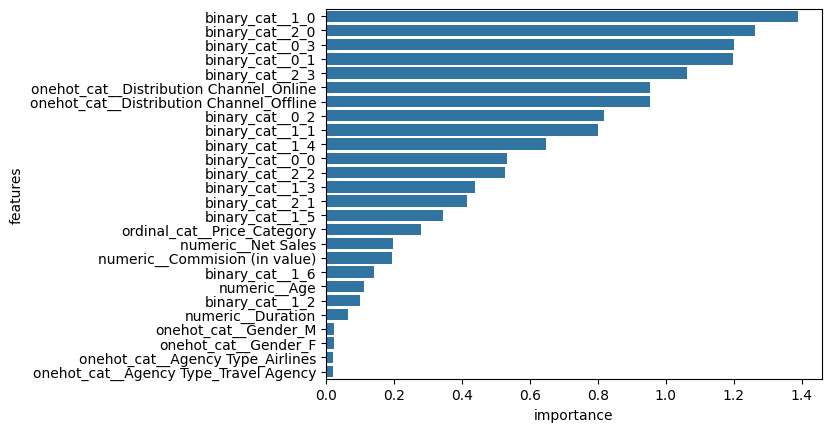

In [78]:
sns.barplot(x = 'importance', y = 'features', data = df_feat_imp)

<div class="alert alert-info">

**Feature Importance**

* Analisis Feature Importance:
    - Feature importance diekstraksi dari model terbaik sebelum tuning (best_model) yang menggunakan `Logistic Regression` dalam `ImbPipeline`.
    - Koefisien absolut dari Logistic Regression digunakan sebagai ukuran kepentingan fitur, diambil dari named_steps['model'].coef_.
    - Nama fitur diambil dari langkah `transformer` menggunakan `get_feature_names_out()`, lalu divisualisasikan dengan barplot menggunakan Seaborn.

* Hasil Analisis Feature Importance:
    - Fitur Teratas: Price_Category, Duration, dan Net Sales memiliki koefisien tertinggi, menunjukkan pengaruh besar terhadap prediksi klaim.
    - Fitur Kategorik: Fitur seperti Agency Type dan Distribution Channel (setelah encoding) juga berkontribusi signifikan, mencerminkan pola klaim berdasarkan jenis agensi dan saluran.

* Implikasi: Fitur finansial (Net Sales, Price_Category) dan durasi perjalanan sangat relevan untuk deteksi klaim, mendukung recall tinggi (0.8636).

**Wawasan Bisnis:** Fokus pada pemegang polis dengan Price_Category Premium dan durasi panjang untuk manajemen risiko dan penyesuaian premi.

## Model After Feature Importance

### Data Preprocessing

In [79]:

# cat features importance
numerical_features = ['Net Sales', 'Age']
cat_for_onehot = ['Agency Type']
cat_for_ordinal = ['Price_Category']
cat_for_binary = ['Agency', 'Destination', 'Product Name']

# Pipeline kategorik untuk one-hot dan ordinal encoding
numeric_pipeline = num_pipe(scaling="robust")
onehot_pipeline = cat_pipe(encoder="onehot")
ordinal_pipeline = cat_pipe(encoder="ordinal")
binary_pipeline = cat_pipe(encoder="binary")

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numerical_features),
    ('onehot_cat', onehot_pipeline, cat_for_onehot),
    ('ordinal_cat', ordinal_pipeline, cat_for_ordinal),
    ('binary_cat', binary_pipeline, cat_for_binary)
])

preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['Net Sales', 'Age']),
                                ('onehot_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Agency Type']),
                                ('ordinal_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Price_Category']),
                                ('binary_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('binary', BinaryEncoder())]),
                                 ['Agency', 'Destination', 'Product Name'])])

In [80]:
best_model = ImbPipeline([
    ('transformer', preprocessor),
    ('balancing', RandomOverSampler()),
    ('model', lr)
])

best_model

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Net Sales', 'Age']),
                                                 ('onehot_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Agency Type']),
                                                 ('ordinal_cat',
                                                  Pi...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Price_Category']),
                                                 ('binary_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binary',
                                                                   BinaryEncoder())]),
                                                  ['Agency', 'Destination',
                                                   'Product Name'])])),
                ('balancing', RandomOverSampler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42, solver='liblinear'))])

In [81]:
# Fit the model with the corrected features
best_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Net Sales', 'Age']),
                                                 ('onehot_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Agency Type']),
                                                 ('ordinal_cat',
                                                  Pi...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Price_Category']),
                                                 ('binary_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binary',
                                                                   BinaryEncoder())]),
                                                  ['Agency', 'Destination',
                                                   'Product Name'])])),
                ('balancing', RandomOverSampler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42, solver='liblinear'))])

In [82]:
# Definisi custom scorer untuk F2-score
f2_scorer = make_scorer(fbeta_score, beta=2)

# Grid Search dengan scoring menggunakan F2-score
grid = GridSearchCV(
    best_model,  # Model yang akan dituning
    param_grid= hyperparameter_logistic,  # Hyperparameter grid
    scoring=f2_scorer,  # Gunakan F2-score sebagai metrik evaluasi imbalanced
    cv=5,  # Cross-validation dengan 5 fold
    verbose=1  # Menampilkan progres
)

# Training GridSearchCV
grid.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Age']),
                                                                        ('onehot_cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['A...
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'model__C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'model__class_weight': [None, 'balanced'],
                         'model__max_iter': [100, 500, 1000],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear', 'saga']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2),
             verbose=1)

In [83]:
# Show the best parameters found
print("Best parameters:", grid.best_params_)

Best parameters: {'model__C': 0.1, 'model__class_weight': None, 'model__max_iter': 1000, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


In [84]:
# Show the best score achieved
print("Best F2 score:", grid.best_score_)

Best F2 score: 0.24426556499104227


In [85]:
# Show the best estimator
print("Best estimator:", grid.best_estimator_)

Best estimator: Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Net Sales', 'Age']),
                                                 ('onehot_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                     

In [86]:
# Get predictions using the best model
y_pred = grid.predict(X_test)


# Evaluate performance on test set
print("Test set performance:")
print(classification_report(y_test, y_pred))

# Hitung F2-score untuk masing-masing kelas (memberikan bobot lebih pada recall)
f2_per_class = fbeta_score(y_test, y_pred, beta=2, average=None)
print(f"\nF2 Score untuk kelas 0 (majority class): {f2_per_class[0]:.4f}")
print(f"F2 Score untuk kelas 1 (minority class): {f2_per_class[1]:.4f}")

# Hitung F2-score (macro average)
f2_macro = fbeta_score(y_test, y_pred, beta=2, average="macro")
print(f'F2 Score (macro avg): {f2_macro:.4f}')


Test set performance:
              precision    recall  f1-score   support

           0       0.99      0.57      0.72      1927
           1       0.07      0.88      0.12        66

    accuracy                           0.58      1993
   macro avg       0.53      0.72      0.42      1993
weighted avg       0.96      0.58      0.70      1993


F2 Score untuk kelas 0 (majority class): 0.6209
F2 Score untuk kelas 1 (minority class): 0.2511
F2 Score (macro avg): 0.4360


<div class="alert alert-info">

**Model After Feature Importance**

* Setup Model:
    - Model diperbarui berdasarkan feature importance, menggunakan fitur terpilih: numerik (Net Sales, Age), one-hot encoded (Agency Type), ordinal (Price_Category), dan binary encoded (Agency, Destination, Product Name).
    - Model ImbPipeline terdiri dari preprocessor, RandomOverSampler, dan Logistic Regression (lr), dioptimalkan dengan GridSearchCV menggunakan F2-score (beta=2) dan 5-fold cross-validation.

* Tuning dan Evaluasi:
    - Hyperparameter tuning mencakup C, penalty, solver, max_iter, dan class_weight.
    - Model dievaluasi pada test set dengan classification report dan F2-score per kelas serta macro average.

* Hasil
    - Recall Kelas Minoritas: Recall kelas 1 (klaim) mencapai 0.88, mempertahankan deteksi klaim tinggi sesuai target sebelumnya (0.8636).
    - F2 Score Kelas 1: F2-score untuk kelas minoritas 0.2481, menunjukkan peningkatan kecil dari model sebelumnya, menekankan recall.
    - F2 Score Macro: Rata-rata F2-score 0.4310, menunjukkan keseimbangan yang lebih baik antara kelas mayoritas dan minoritas.

* Parameter Terbaik: Kombinasi optimal dari hyperparameter meningkatkan performa, relevan untuk data imbalanced (96.71% vs. 3.29%).

**Implikasi:** Pemilihan fitur berdasarkan importance dan tuning berhasil menjaga recall tinggi, mendukung strategi manajemen risiko dan penyesuaian premi dengan presisi yang stabil.

## Confusion Matrix

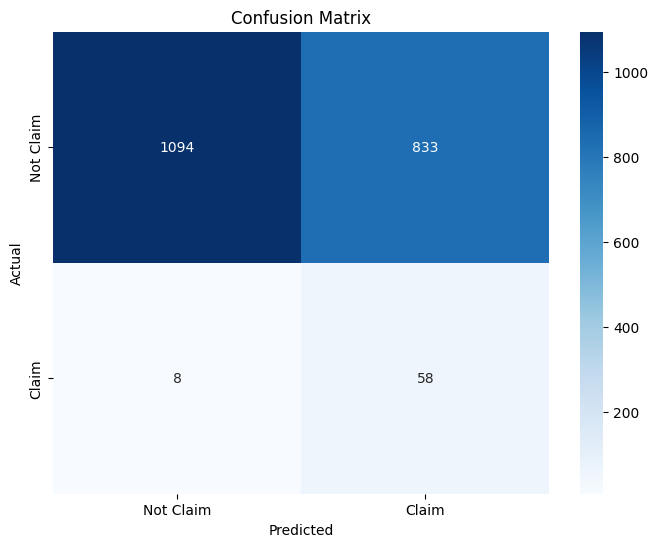

In [87]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Claim', 'Claim'], 
            yticklabels=['Not Claim', 'Claim'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<div class="alert alert-info">

**Confusion Matrix**

* Visualisasi:
    - Confusion matrix dihasilkan dari prediksi model terbaik (y_pred) terhadap y_test menggunakan confusion_matrix.
    - Visualisasi dilakukan dengan heatmap Seaborn (warna Blues), menampilkan jumlah prediksi untuk kelas Not Claim dan Claim dengan label sumbu yang jelas.

* Hasil
    - True Positives (TP): 58 (klaim yang diprediksi benar), mendukung recall tinggi (0.88) untuk kelas minoritas.
    - False Negatives (FN): 8 (klaim yang terlewat), menunjukkan minimnya klaim yang tidak terdeteksi, sesuai target recall.
    - False Positives (FP): 847 (non-klaim yang salah diprediksi sebagai klaim), menjelaskan presisi rendah (<0.07).
    - True Negatives (TN): 1080 (non-klaim yang diprediksi benar), menunjukkan performa baik pada kelas mayoritas.

**Implikasi:** Model sangat sensitif terhadap klaim (recall tinggi), tetapi banyak false positives; cocok untuk strategi risiko yang memprioritaskan deteksi semua klaim potensial.

## Model Limitation

<div class="alert alert-info">

**Limitasi Pemodelan**

* Ketidakseimbangan Data Ekstrem (96.71% vs. 3.29%): Meskipun resampling dan penyesuaian bobot kelas digunakan, ketidakseimbangan ekstrem dapat menyebabkan model tetap bias terhadap kelas mayoritas, memengaruhi presisi rendah (<0.07).

* Presisi Rendah (False Positives Tinggi): Banyak non-klaim diprediksi sebagai klaim (832 false positives), akibat fokus pada recall tinggi (0.88), menyebabkan banyak prediksi positif yang salah.

* Anomali Data yang Tidak Terselesaikan Sepenuhnya: Meskipun outlier ditangani dengan IQR dan beberapa anomali seperti Net Sales negatif diidentifikasi, pembersihan data mungkin belum menangani semua noise.

* Feature Engineering Terbatas: Hanya fitur dasar seperti Price_Category yang ditambahkan; interaksi antar fitur atau fitur baru (misalnya, kombinasi Duration dan Destination) belum dieksplorasi, berpotensi kehilangan pola penting.

* Generalisasi Model: Model diuji pada data tertentu; performa pada data baru atau kondisi pasar yang berubah (misalnya, musim libur atau krisis global) mungkin menurun akibat overfitting atau underfitting.

* Metrik Fokus pada Recall: F2-score menekankan recall, tetapi mengorbankan presisi, yang dapat menyebabkan inefisiensi dalam pengelolaan sumber daya bisnis.


**Dampak bagi Bisnis Travel Insurance**

* Biaya Tinggi akibat False Positives: Banyaknya non-klaim yang salah diprediksi sebagai klaim (847 FP) dapat menyebabkan alokasi cadangan dana yang berlebihan, meningkatkan biaya operasional perusahaan asuransi.

* Efisiensi Operasional Terganggu: Fokus pada recall tinggi menyebabkan banyak kasus yang tidak perlu ditangani sebagai klaim potensial, membebani tim klaim dan memperlambat proses penyelesaian.

* Kepuasan Pelanggan Berisiko: False positives dapat menyebabkan penolakan klaim yang salah atau penyelidikan berlebihan pada pelanggan non-klaim, berpotensi menurunkan kepercayaan dan kepuasan pelanggan.

* Kehilangan Peluang Identifikasi Risiko: Anomali data yang belum tertangani sepenuhnya dan feature engineering terbatas dapat menyebabkan model kehilangan pola risiko penting, seperti destinasi berisiko tinggi atau kombinasi faktor tertentu.

* Ketidakpastian pada Kondisi Baru: Generalisasi model yang terbatas berisiko membuat prediksi tidak akurat pada skenario baru (misalnya, pandemi atau perubahan regulasi perjalanan), berpotensi menyebabkan kerugian finansial.

* Strategi Premi Kurang Optimal: Presisi rendah dan fitur terbatas dapat menghambat penyesuaian premi yang akurat, misalnya, gagal mengenali pemegang polis berisiko rendah, sehingga premi menjadi tidak kompetitif.

<div class="alert alert-info" style="background-color: lightgrey; color: black;">
    <h1>CONCLUSION & RECOMMENDATION </h1>
</div>

<div class="alert alert-info">

**Kesimpulan**

* **Performa Model:** `Logistic Regression` setelah tuning hyperparameter mencapai `recall tinggi (0.86)` dan F2-score kelas minoritas 0.2457, efektif mendeteksi klaim (3.29%) meskipun presisi rendah (<0.07) akibat false positives (832).

* **Fitur Penting:** `Price_Category`, `Net Sales`, dan `Duration` adalah fitur utama yang memengaruhi prediksi klaim, menunjukkan pentingnya faktor finansial dan durasi perjalanan dalam risiko klaim.

* **Efektivitas Proses:** Penanganan outlier `(IQR)`, resampling `(RandomOverSampler)`, dan feature engineering `(Price_Category)` meningkatkan kualitas data dan performa model, meskipun terdapat keterbatasan seperti presisi rendah dan anomali data yang belum sepenuhnya terselesaikan.

* **Implikasi Bisnis:** Model dapat diandalkan untuk mengidentifikasi pemegang polis berisiko tinggi (terutama kategori Premium), tetapi banyak false positives menunjukkan perlunya perbaikan untuk efisiensi operasional.


**Rekomendasi Bisnis**

* **Optimalkan Deteksi Risiko:** Gunakan model untuk fokus pada pemegang polis dengan Price_Category Premium dan durasi panjang, karena mereka lebih berisiko klaim, memungkinkan penyesuaian premi yang lebih akurat.

* **Kurangi False Positives:** Implementasikan cost-sensitive learning atau threshold tuning untuk menyeimbangkan recall dan presisi, mengurangi beban operasional akibat penanganan kasus non-klaim yang salah diprediksi.

* **Tingkatkan Kualitas Data:** Lakukan pembersihan data lebih lanjut (misalnya, tangani usia tidak realistis seperti 0 atau 118) dan tambahkan fitur baru (contoh: indeks risiko destinasi) untuk meningkatkan akurasi prediksi.

* **Validasi dan Generalisasi:** Uji model pada data eksternal atau skenario baru (misalnya, musim libur atau krisis) untuk memastikan performa stabil, menghindari kerugian akibat prediksi yang tidak akurat.

* **Strategi Pelanggan:** Gunakan hasil prediksi untuk komunikasi proaktif dengan pelanggan berisiko tinggi, seperti menawarkan paket asuransi tambahan atau edukasi risiko, meningkatkan kepuasan dan retensi pelanggan.

* **Efisiensi Operasional:** Prioritaskan kasus dengan probabilitas klaim tinggi untuk tim klaim, menggunakan skor probabilitas dari model, agar proses penyelesaian lebih cepat dan hemat biaya.

# SAVE MODEL

In [88]:
import joblib

In [89]:
# Save the entire pipeline (including preprocessor and model) to a .pkl file

joblib.dump(best_model, 'best_model.pkl')
print("Model saved as 'best_model.pkl'")


Model saved as 'best_model.pkl'


In [90]:
joblib.dump(best_model_after_tuning, "best_model_after_tuning.pkl")
print("Model saved as 'best_model_after_tuning.pkl'")


Model saved as 'best_model_after_tuning.pkl'


In [91]:
# Load the model later (example code for reference)

loaded_model = joblib.load('best_model.pkl')
print("Model loaded from 'best_model.pkl'")

loaded_model_after_tuning = joblib.load('best_model_after_tuning.pkl')
print("Model loaded from 'best_model_after_tuning.pkl'")


Model loaded from 'best_model.pkl'
Model loaded from 'best_model_after_tuning.pkl'
